In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("averkij/tennessee-eastman-process-simulation-dataset")

In [46]:
import os
os.listdir(path)

['TEP_FaultFree_Testing.RData',
 'TEP_FaultFree_Training.RData',
 'TEP_Faulty_Testing.RData',
 'TEP_Faulty_Training.RData']

# Content
Each .RData file is an external representation of an R dataframe that can be read into an R environment with the 'load' function. The variables loaded are named ‘fault_free_training’, ‘fault_free_testing’, ‘faulty_testing’, and ‘faulty_training’, corresponding to the RData files.

Each dataframe contains 55 columns:

Column 1 ('faultNumber') ranges from 1 to 20 in the “Faulty” datasets and represents the fault type in the TEP. The “FaultFree” datasets only contain fault 0 (i.e. normal operating conditions).

Column 2 ('simulationRun') ranges from 1 to 500 and represents a different random number generator state from which a full TEP dataset was generated (Note: the actual seeds used to generate training and testing datasets were non-overlapping).

Column 3 ('sample') ranges either from 1 to 500 (“Training” datasets) or 1 to 960 (“Testing” datasets). The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively. Note that the faults were introduced 1 and 8 hours into the Faulty Training and Faulty Testing datasets, respectively.

Columns 4 to 55 contain the process variables; the column names retain the original variable names.

link to the data : https://www.kaggle.com/datasets/averkij/tennessee-eastman-process-simulation-dataset

In [3]:
# read the R files with the use of pyreader
import pyreadr
df_fault = pyreadr.read_r(path+'/TEP_Faulty_Training.RData')
df_fault = df_fault['faulty_training']
df_fault.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0            1            1.0       1  0.25038   3674.0   4529.0   9.2320   
1            1            1.0       2  0.25109   3659.4   4556.6   9.4264   
2            1            1.0       3  0.25038   3660.3   4477.8   9.4426   
3            1            1.0       4  0.24977   3661.3   4512.1   9.4776   
4            1            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [5]:
df_fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   faultNumber    int32  
 1   simulationRun  float64
 2   sample         int32  
 3   xmeas_1        float64
 4   xmeas_2        float64
 5   xmeas_3        float64
 6   xmeas_4        float64
 7   xmeas_5        float64
 8   xmeas_6        float64
 9   xmeas_7        float64
 10  xmeas_8        float64
 11  xmeas_9        float64
 12  xmeas_10       float64
 13  xmeas_11       float64
 14  xmeas_12       float64
 15  xmeas_13       float64
 16  xmeas_14       float64
 17  xmeas_15       float64
 18  xmeas_16       float64
 19  xmeas_17       float64
 20  xmeas_18       float64
 21  xmeas_19       float64
 22  xmeas_20       float64
 23  xmeas_21       float64
 24  xmeas_22       float64
 25  xmeas_23       float64
 26  xmeas_24       float64
 27  xmeas_25       float64
 28  xmeas_26       float64
 29  xmeas_27      

In [6]:
# check the existence of missing values
df_fault.isna().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [7]:
df_fault['faultNumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [4]:
# change data type of simulationRun and sample from float to integer
df_fault = df_fault.astype({'faultNumber':'int', 'simulationRun':'int', 'sample':'int'})

In [5]:
# load the fault-free data
df_free = pyreadr.read_r(path+'/TEP_FaultFree_Training.RData')
df_free = df_free['fault_free_training']
# print(df_free['faultNumber'].unique()) # zero refers to being fault-free

In [10]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  float64
 1   simulationRun  250000 non-null  float64
 2   sample         250000 non-null  int32  
 3   xmeas_1        250000 non-null  float64
 4   xmeas_2        250000 non-null  float64
 5   xmeas_3        250000 non-null  float64
 6   xmeas_4        250000 non-null  float64
 7   xmeas_5        250000 non-null  float64
 8   xmeas_6        250000 non-null  float64
 9   xmeas_7        250000 non-null  float64
 10  xmeas_8        250000 non-null  float64
 11  xmeas_9        250000 non-null  float64
 12  xmeas_10       250000 non-null  float64
 13  xmeas_11       250000 non-null  float64
 14  xmeas_12       250000 non-null  float64
 15  xmeas_13       250000 non-null  float64
 16  xmeas_14       250000 non-null  float64
 17  xmeas_15       250000 non-nul

In [11]:
df_free.isna().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [6]:
# change data type of simulationRun and sample from float to integer
df_free = df_free.astype({'faultNumber':'int', 'simulationRun':'int', 'sample':'int'})

In [7]:
# combine the two
import numpy as np
import pandas as pd
df_combined = pd.concat([df_free, df_fault])
df_combined

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0                  0              1       1  0.25038   3674.0   4529.0   
1                  0              1       2  0.25109   3659.4   4556.6   
2                  0              1       3  0.25038   3660.3   4477.8   
3                  0              1       4  0.24977   3661.3   4512.1   
4                  0              1       5  0.29405   3679.0   4497.0   
...              ...            ...     ...      ...      ...      ...   
4999995           20            500     496  0.23419   3655.3   4461.7   
4999996           20            500     497  0.26704   3647.4   4540.2   
4999997           20            500     498  0.26543   3630.3   4571.6   
4999998           20            500     499  0.27671   3655.7   4498.9   
4999999           20            500     500  0.27421   3640.4   4474.4   

         xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
0         9.2320   26.889   42.402   2704.3  ...  53.744  24.657  62.544   
1         9.4264   26.721   42.576   2705.0  ...  53.414  24.588  59.259   
2         9.4426   26.875   42.070   2706.2  ...  54.357  24.666  61.275   
3         9.4776   26.758   42.063   2707.2  ...  53.946  24.725  59.856   
4         9.3381   26.889   42.650   2705.1  ...  53.658  28.797  60.717   
...          ...      ...      ...      ...  ...     ...     ...     ...   
4999995   9.3448   27.008   42.481   2703.0  ...  53.670  23.350  61.061   
4999996   9.3546   27.034   42.671   2704.7  ...  54.650  26.362  60.020   
4999997   9.4089   27.129   42.470   2705.1  ...  54.274  26.521  59.824   
4999998   9.3781   27.353   42.281   2705.8  ...  53.506  26.781  62.818   
4999999   9.3866   27.145   41.985   2706.0  ...  53.800  27.027  59.757   

          xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0        22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1        22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2        22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3        22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4        21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...         ...     ...     ...     ...     ...     ...     ...  
4999995  20.719  40.999  38.653  47.386  47.528  40.212  17.659  
4999996  20.263  41.579  33.624  47.536  47.647  41.199  18.741  
4999997  20.189  41.505  40.967  52.437  47.802  41.302  23.199  
4999998  20.453  40.208  40.957  47.628  48.086  40.510  15.932  
4999999  20.157  40.326  36.039  48.885  48.170  41.115  15.752  

[5250000 rows x 55 columns]

Draw histograms of each TEP variable

In [8]:
# make a list of TEP variables
tep = df_fault.columns[3:].to_list()
len(tep)

52

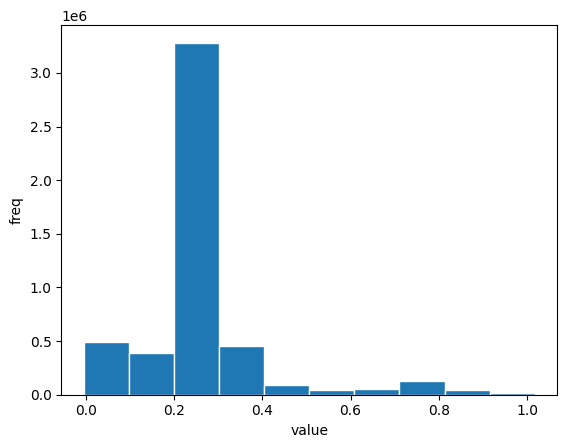

In [52]:
import matplotlib.pyplot as plt
plt.hist(df_fault[tep[0]], edgecolor='w')
plt.xlabel('value')
plt.ylabel('freq')
plt.show()

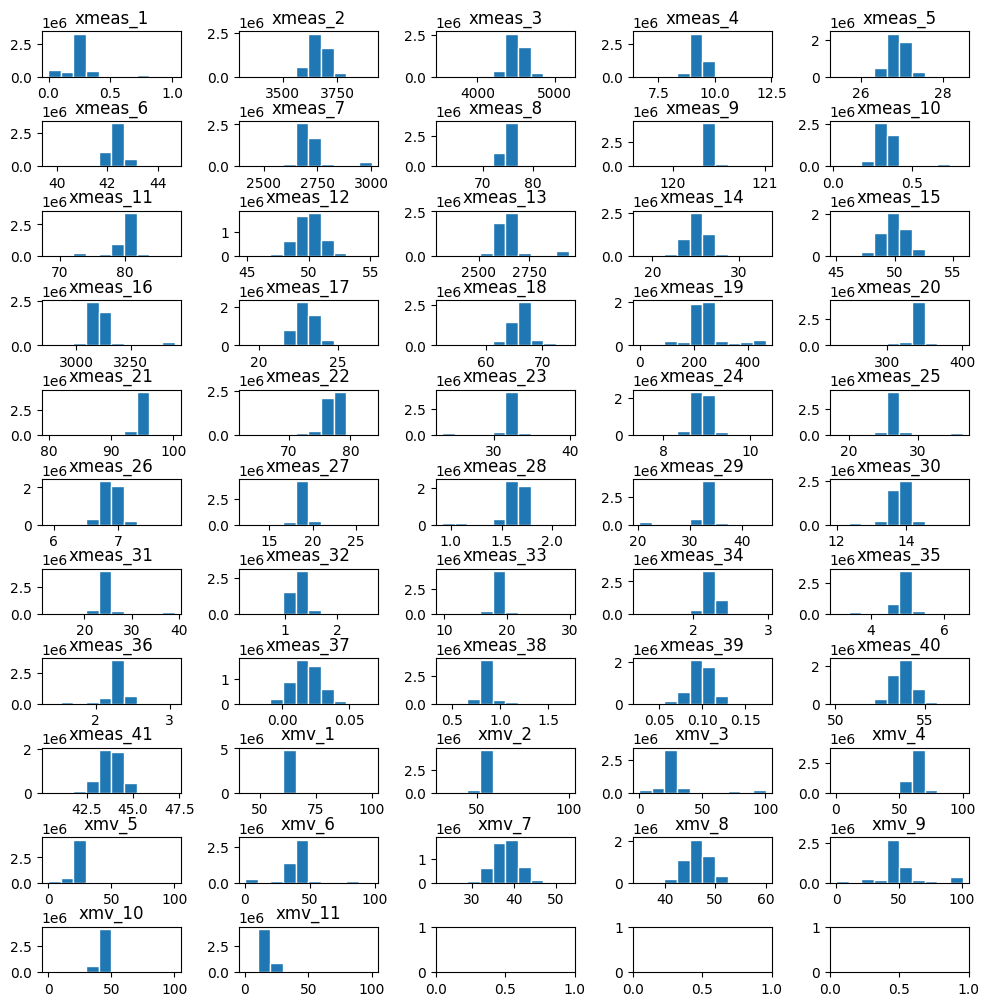

In [16]:
fig, axs = plt.subplots(11, 5, figsize=(10,10))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].hist(df_fault[tep[i]], edgecolor='w')
    axs[i//5, i%5].set_title(tep[i])
plt.show()

In [17]:
fig.savefig('df_fault.png')

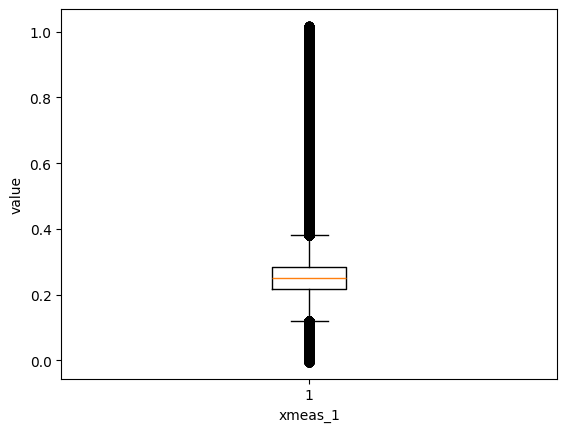

In [18]:
# their distributions appear not too bad, yet recheck them with box plot
plt.boxplot(df_fault[tep[0]])
plt.xlabel(tep[0])
plt.ylabel('value')
plt.show()

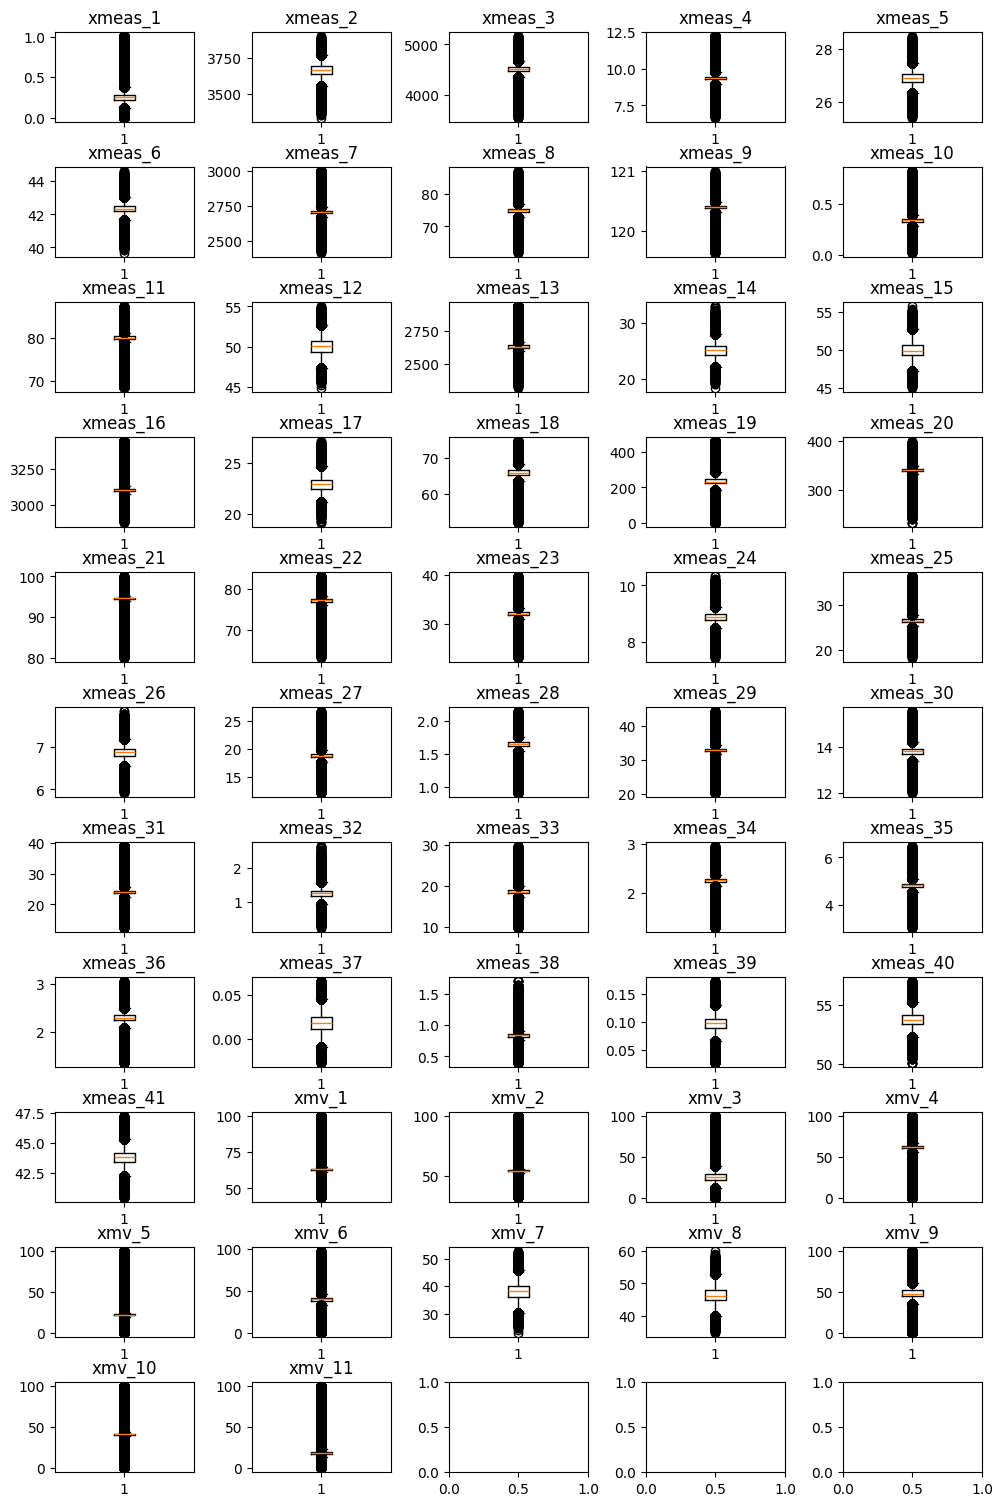

In [19]:
fig, axs = plt.subplots(11, 5, figsize=(10,15))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].boxplot(df_fault[tep[i]])
    axs[i//5, i%5].set_title(tep[i])
plt.show()

In [20]:
df_fault.describe()

faultNumber  simulationRun        sample       xmeas_1       xmeas_2  \
count  5.000000e+06   5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.050000e+01   2.505000e+02  2.505000e+02  2.613588e-01  3.663777e+03   
std    5.766282e+00   1.443373e+02  1.443373e+02  1.495384e-01  4.316941e+01   
min    1.000000e+00   1.000000e+00  1.000000e+00 -4.735000e-03  3.327400e+03   
25%    5.750000e+00   1.257500e+02  1.257500e+02  2.183000e-01  3.636500e+03   
50%    1.050000e+01   2.505000e+02  2.505000e+02  2.511300e-01  3.663300e+03   
75%    1.525000e+01   3.752500e+02  3.752500e+02  2.832100e-01  3.690200e+03   
max    2.000000e+01   5.000000e+02  5.000000e+02  1.017500e+00  3.906700e+03   

            xmeas_3       xmeas_4       xmeas_5       xmeas_6       xmeas_7  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   4.506046e+03  9.370345e+00  2.690156e+01  4.236419e+01  2.723005e+03   
std    1.110368e+02  3.646151e-01  2.320034e-01  3.172128e-01  7.599384e+01   
min    3.540700e+03  6.639900e+00  2.538600e+01  3.965600e+01  2.413800e+03   
25%    4.469000e+03  9.264200e+00  2.676000e+01  4.218100e+01  2.697600e+03   
50%    4.508500e+03  9.355200e+00  2.690100e+01  4.234800e+01  2.705600e+03   
75%    4.548000e+03  9.456800e+00  2.704300e+01  4.252400e+01  2.715000e+03   
max    5.175800e+03  1.224000e+01  2.848600e+01  4.465300e+01  3.000500e+03   

       ...         xmv_2         xmv_3         xmv_4         xmv_5  \
count  ...  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   ...  5.431755e+01  3.043177e+01  6.324830e+01  2.295485e+01   
std    ...  5.258092e+00  2.048365e+01  7.400080e+00  1.108258e+01   
min    ...  3.118400e+01 -2.718600e-01 -4.893100e-03 -9.941000e-02   
25%    ...  5.349700e+01  2.228000e+01  6.031400e+01  2.142300e+01   
50%    ...  5.397000e+01  2.521500e+01  6.149900e+01  2.212900e+01   
75%    ...  5.444300e+01  2.879700e+01  6.284100e+01  2.273800e+01   
max    ...  1.000000e+02  1.001900e+02  1.000200e+02  1.001100e+02   

              xmv_6         xmv_7         xmv_8         xmv_9        xmv_10  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   3.992297e+01  3.807265e+01  4.643742e+01  5.060598e+01  4.194845e+01   
std    1.293348e+01  2.949138e+00  2.358468e+00  1.759840e+01  1.001227e+01   
min    0.000000e+00  2.280100e+01  3.492300e+01 -3.635500e-01 -2.809500e-01   
25%    3.831300e+01  3.604900e+01  4.487800e+01  4.547900e+01  4.057500e+01   
50%    3.996700e+01  3.815000e+01  4.633900e+01  4.806500e+01  4.120600e+01   
75%    4.150700e+01  3.999100e+01  4.803100e+01  5.188700e+01  4.194900e+01   
max    9.752800e+01  5.312100e+01  5.998000e+01  1.005200e+02  1.003200e+02   

             xmv_11  
count  5.000000e+06  
mean   1.884376e+01  
std    5.176705e+00  
min   -5.327000e-03  
25%    1.714300e+01  
50%    1.829500e+01  
75%    1.953700e+01  
max    1.000100e+02  

[8 rows x 55 columns]

There are too many outliers for now.. Can we simply remove them out of the dataset?
Yet the variables might have somthing to do with fault types. This can be chekcked by

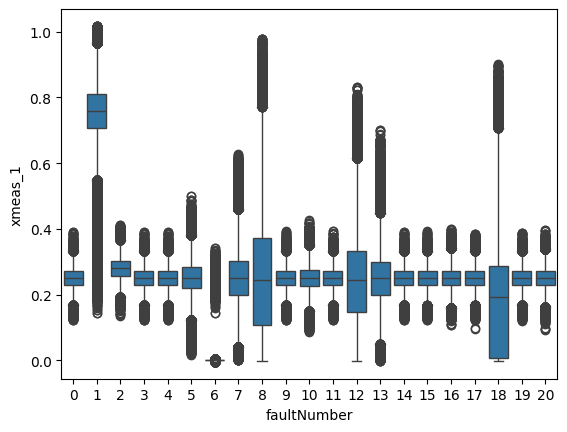

In [53]:
import seaborn as sns
sns.boxplot(x='faultNumber', y='xmeas_1', data=df_combined)
plt.show()

Based on 'xmeas_1', we can effectively detect the fault type one.

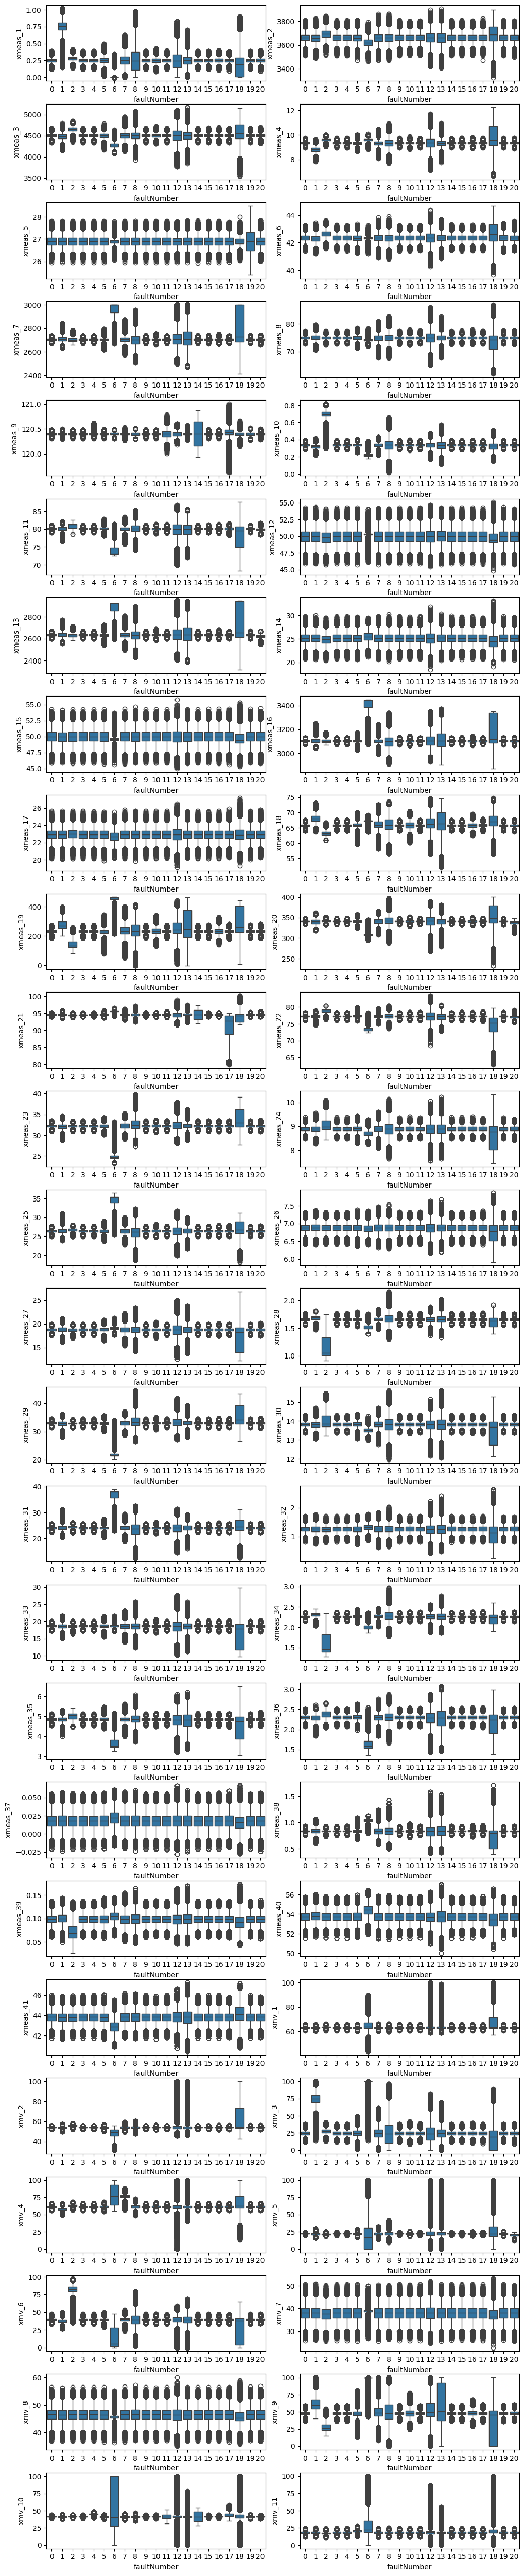

In [22]:
# check the other tep variables
fig, axs = plt.subplots(26,2, figsize=(10,50))
plt.tight_layout()
for idx, name in enumerate(tep):
    sns.boxplot(x='faultNumber', y=name, data=df_combined, ax=axs[idx//2, idx%2])
plt.show()

In [23]:
fig.savefig('tep_fault_type.png', bbox_inches='tight')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# save figures in different img files
nrows = 2
ncols = 2
idx = 0 # index for tep array
figNumMax = len(tep)//(nrows*ncols)
figNumMax

13

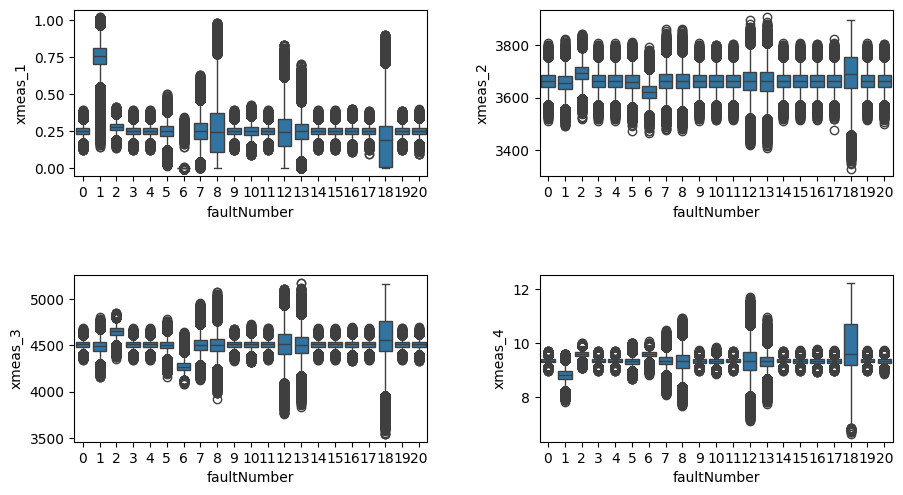

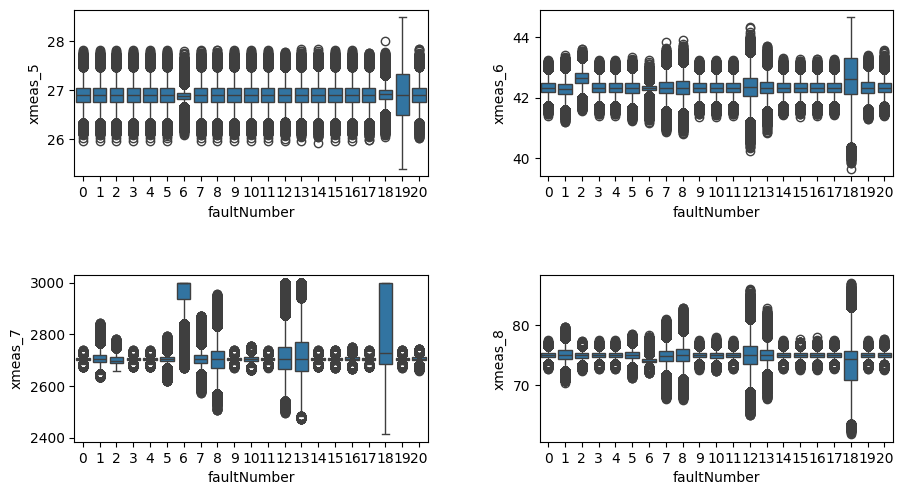

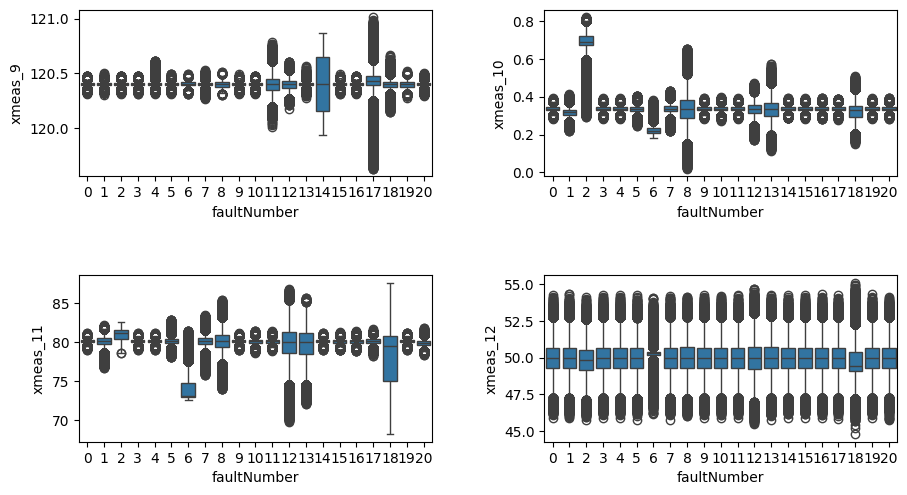

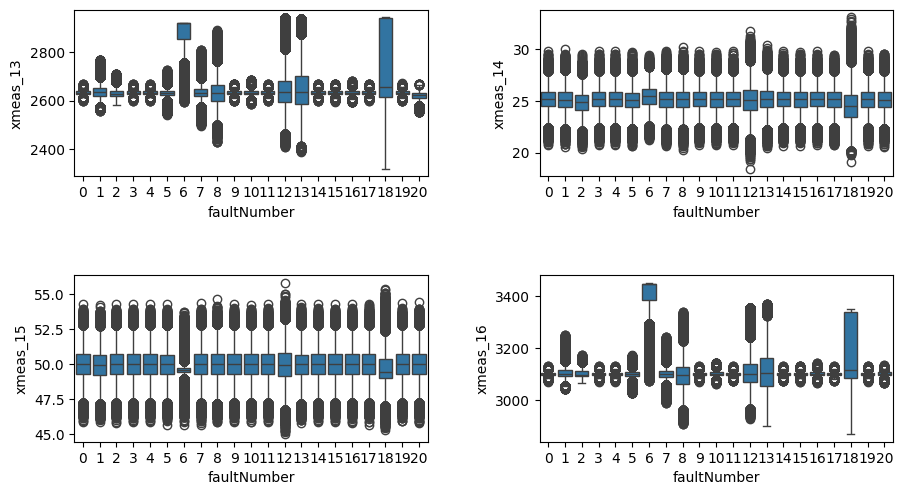

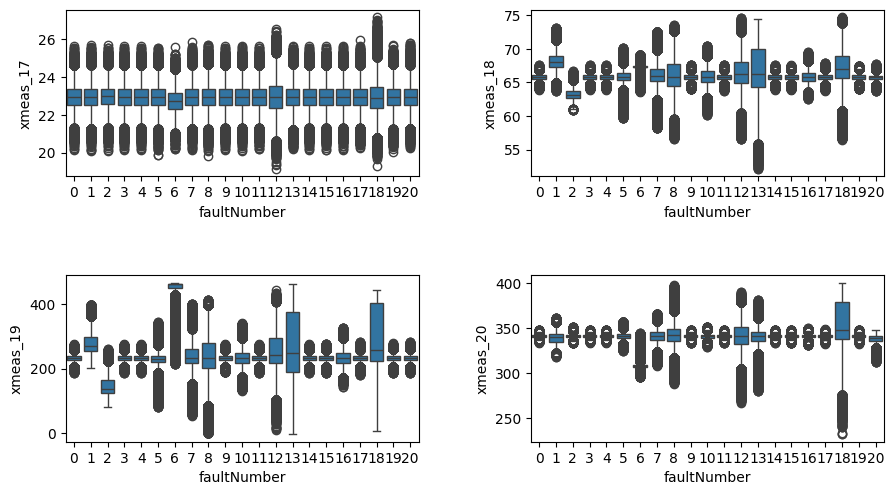

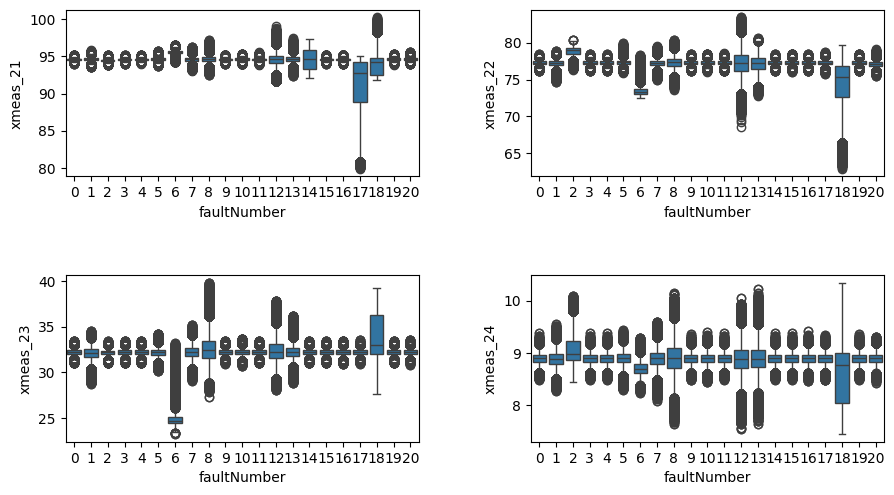

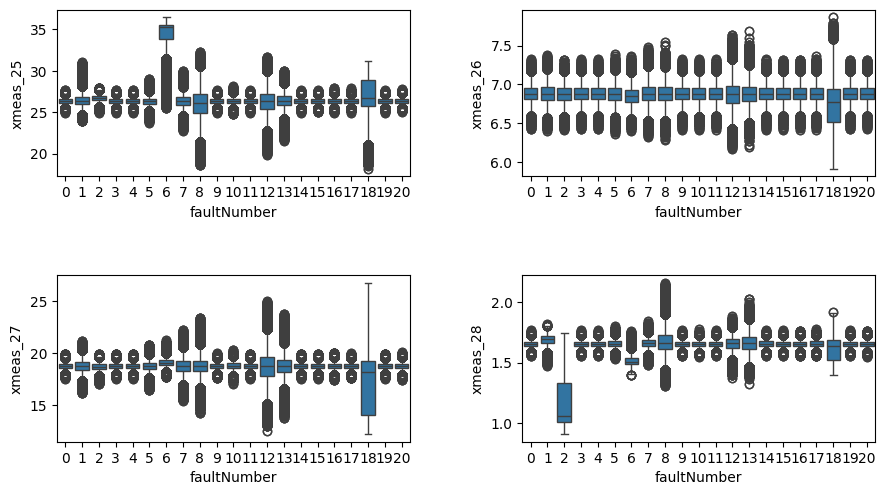

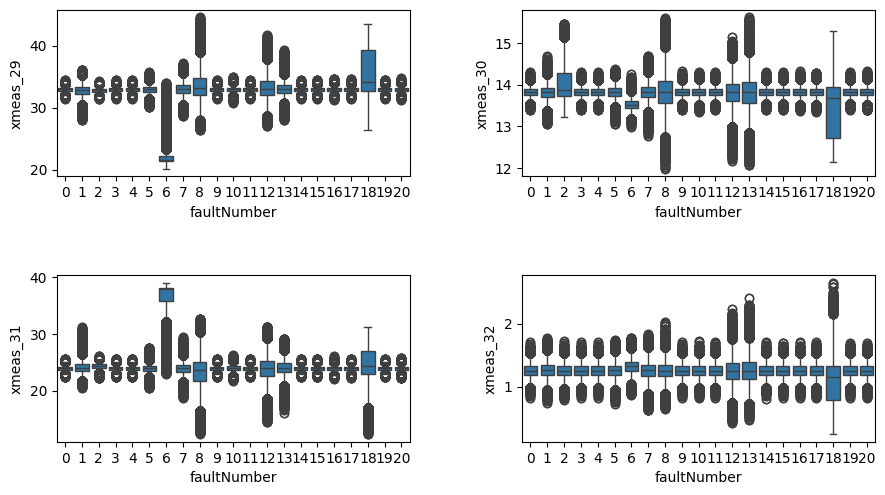

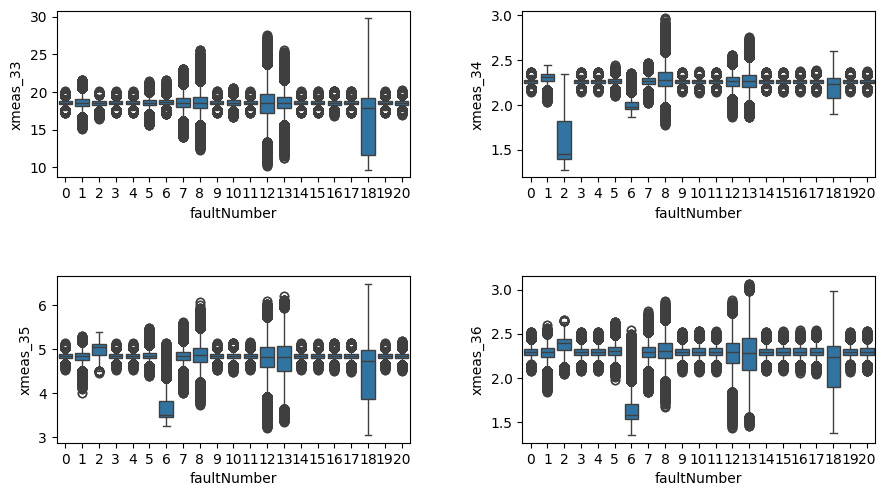

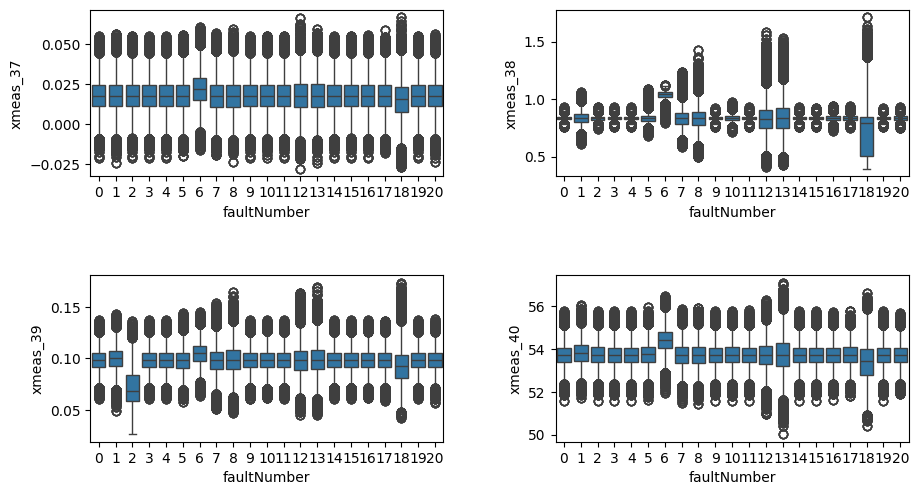

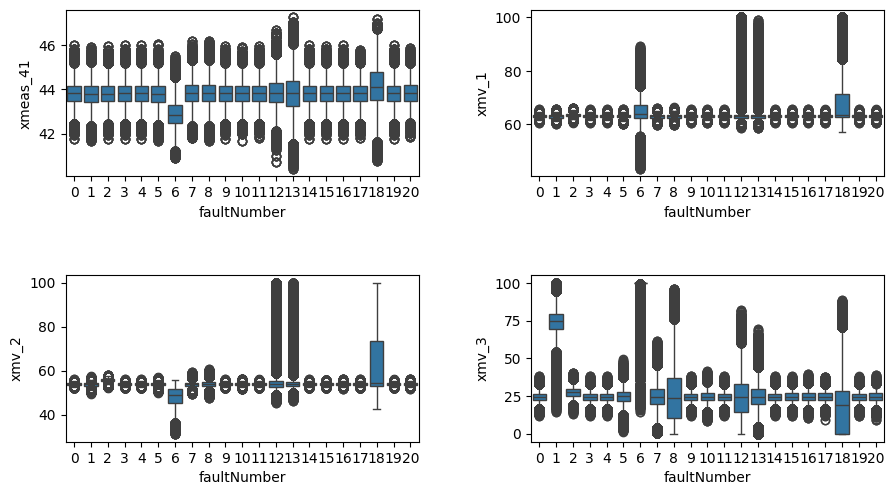

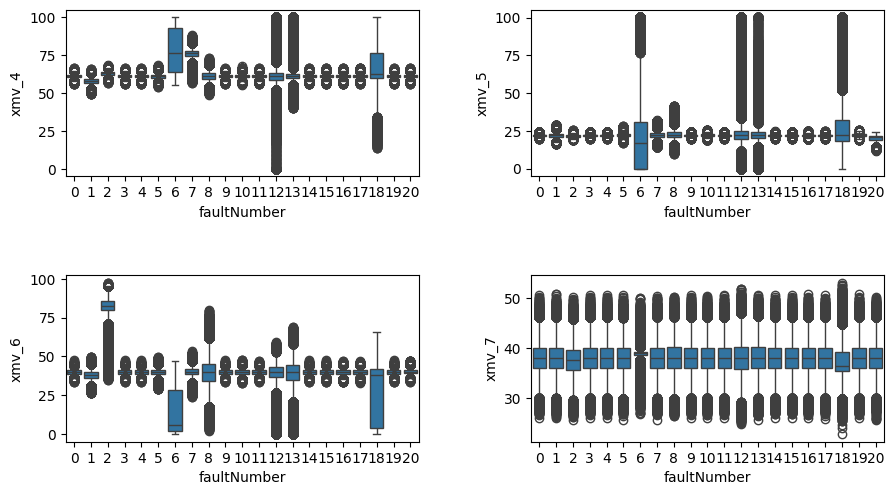

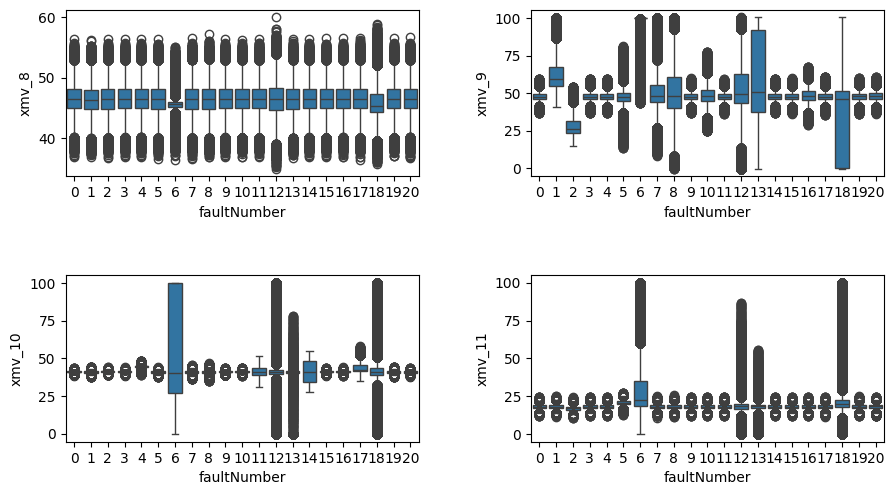

In [13]:
for n in range(figNumMax):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
    plt.tight_layout(pad=5)
    for i in range(nrows): # 0, 1
        for j in range(ncols): # 0, 1
            temp_idx = 2*i + j
            sns.boxplot(x='faultNumber', y=tep[4*n+temp_idx], data=df_combined, ax=axs[i, j])           
            idx += 1
    plt.show()
    fig.savefig('tep_fault_type_{n}.png'.format(n=n+1))

Obviously we don't need all the variables since some variables do not show significant difference from the fault-free one.
For example, 'xmeas_2' seems to be of little use.

In [10]:
# drop variables given the box plots
# indicies of them read 4, 11, 13, 14, 16, 25, 31, 36, 39, 47 and 48 in terms of tep
var_dropped = []
var_dropped.append(tep[4])
var_dropped.append(tep[11])
var_dropped.append(tep[13])
var_dropped.append(tep[14])
var_dropped.append(tep[16])
var_dropped.append(tep[25])
var_dropped.append(tep[31])
var_dropped.append(tep[36])
var_dropped.append(tep[39])
var_dropped.append(tep[47])
var_dropped.append(tep[48])

In [11]:
# subtract two string lists
new_tep = [ ele for ele in tep ]
for i in var_dropped:
  if i in tep:
    new_tep.remove(i)

In [12]:
df_combined_dropped = df_combined.copy()
df_combined_dropped = df_combined_dropped.drop(var_dropped, axis=1)

In [13]:
# to drop variables further, study correalation between variables
corr_combined_dropped = df_combined_dropped.iloc[:,3:].corr()
corr_combined_dropped.head()

xmeas_1   xmeas_2   xmeas_3   xmeas_4   xmeas_6   xmeas_7   xmeas_8  \
xmeas_1  1.000000 -0.158387 -0.150998 -0.577219 -0.154326 -0.493195  0.118706   
xmeas_2 -0.158387  1.000000  0.460683  0.287216  0.293171  0.143539  0.008109   
xmeas_3 -0.150998  0.460683  1.000000  0.151132  0.151558  0.005392  0.321521   
xmeas_4 -0.577219  0.287216  0.151132  1.000000  0.642260  0.476629 -0.680809   
xmeas_6 -0.154326  0.293171  0.151558  0.642260  1.000000  0.248693 -0.516585   

          xmeas_9  xmeas_10  xmeas_11  ...  xmeas_41     xmv_1     xmv_2  \
xmeas_1  0.031448  0.133074  0.464067  ... -0.023300 -0.274012 -0.158909   
xmeas_2  0.028375  0.149582 -0.082622  ...  0.188532  0.305153  0.399049   
xmeas_3 -0.073566  0.288911  0.056119  ...  0.418029  0.241666  0.556081   
xmeas_4  0.025668  0.144696 -0.353662  ...  0.133175  0.554212  0.485203   
xmeas_6  0.026860  0.235860 -0.158899  ...  0.117455  0.399769  0.389562   

            xmv_3     xmv_4     xmv_5     xmv_6     xmv_9    xmv_10    xmv_11  
xmeas_1  0.316421 -0.441571 -0.197023  0.296237 -0.003097 -0.110489 -0.173789  
xmeas_2 -0.341195  0.062165  0.136661  0.053569 -0.256626  0.032516 -0.081085  
xmeas_3 -0.562691 -0.114771  0.111011  0.227728 -0.622344 -0.085278 -0.183361  
xmeas_4 -0.271986  0.568841  0.311065 -0.148943 -0.058391  0.133333  0.045163  
xmeas_6 -0.160991  0.337448  0.213771  0.026910 -0.064956  0.074101 -0.031139  

[5 rows x 41 columns]

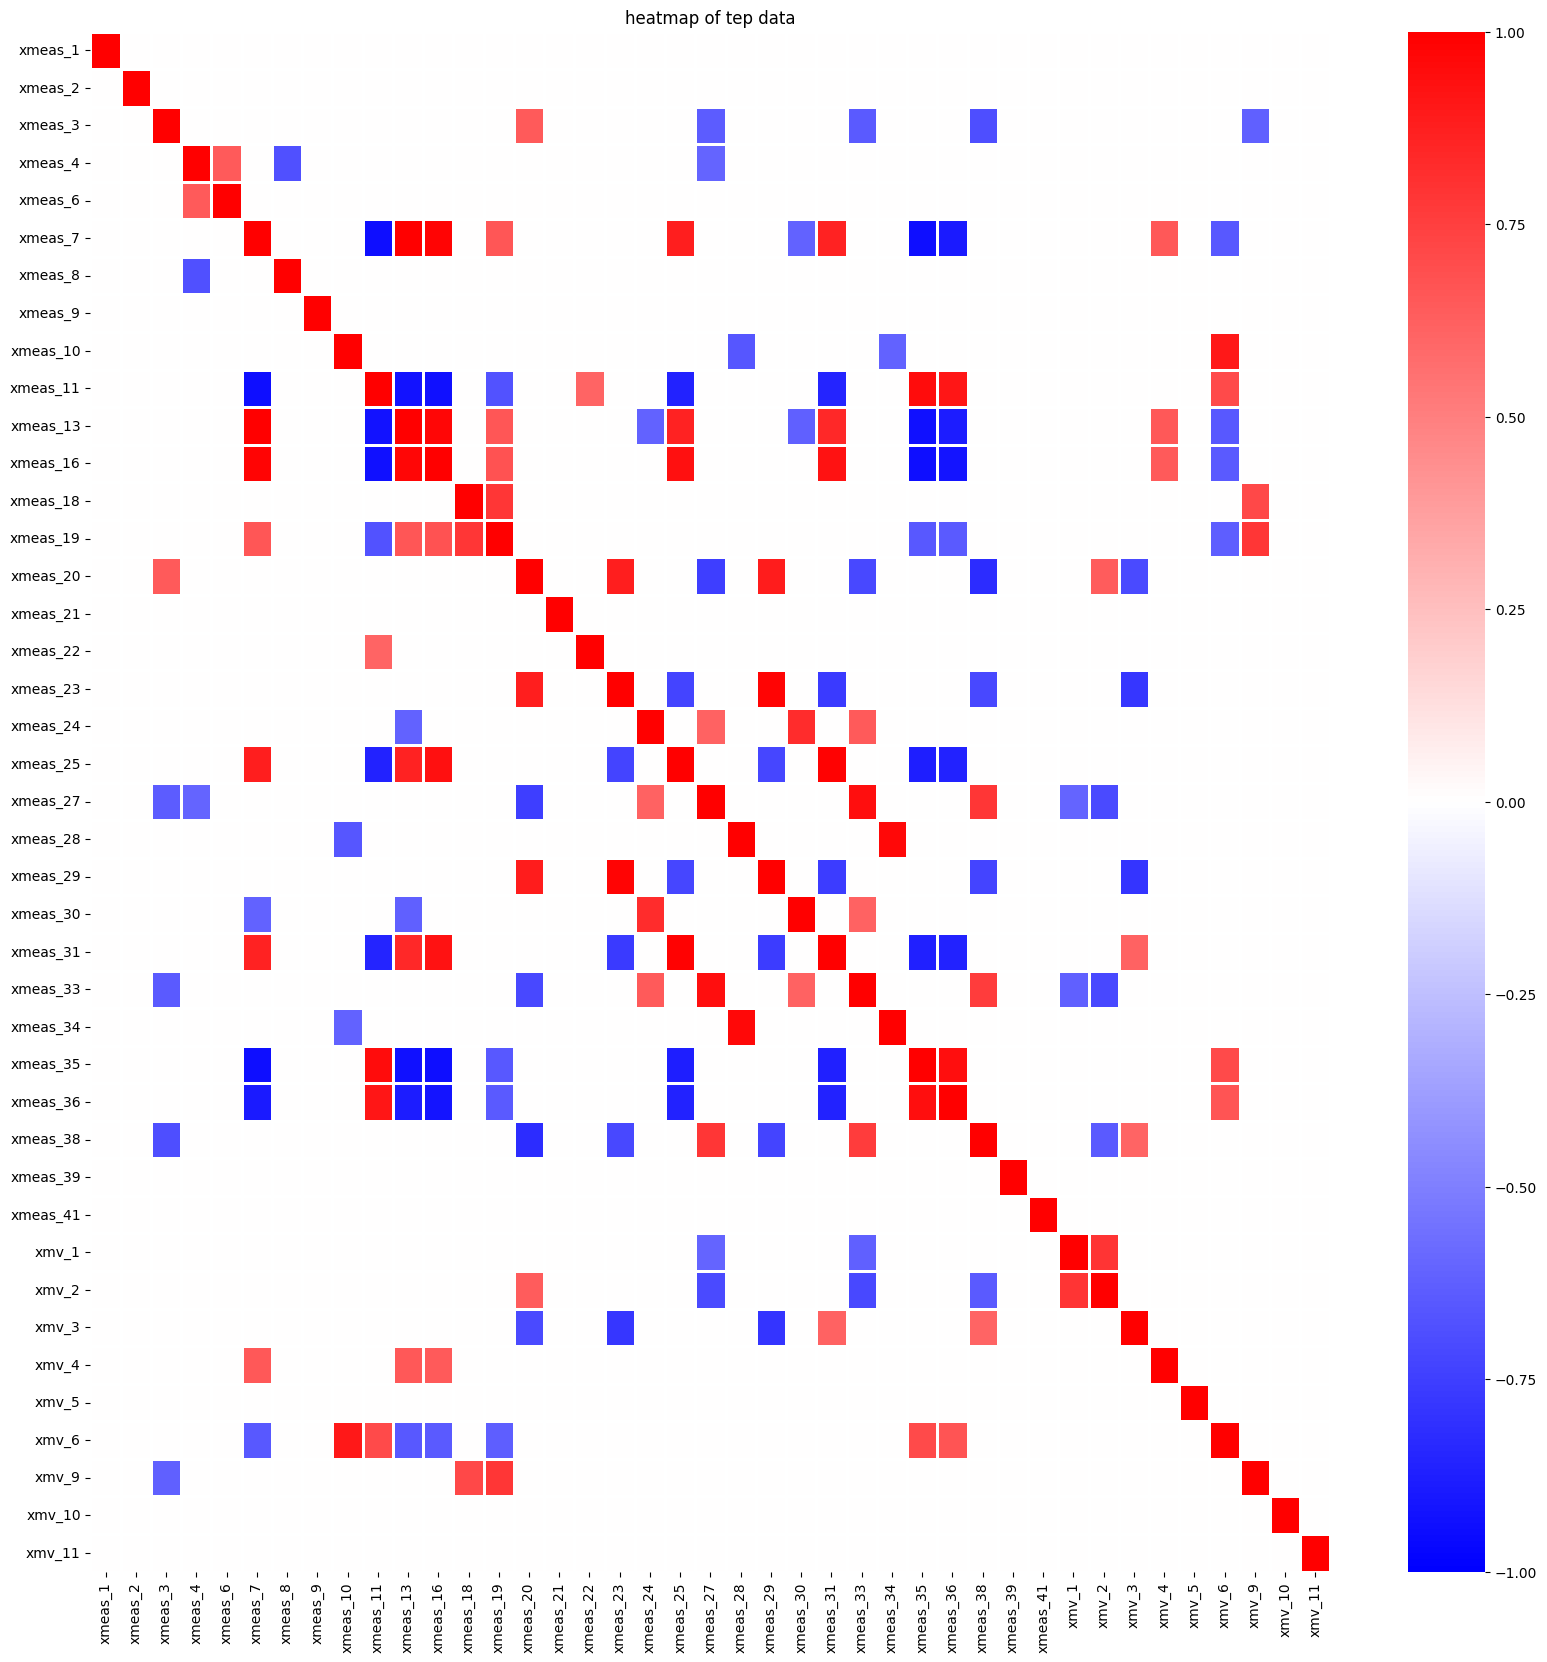

In [15]:
# to easily notice correlated pairs of variabls,
for i in new_tep:
    corr_combined_dropped[i] = corr_combined_dropped[i].apply(lambda x : x if (x>=0.6) | (x<=-0.6) else 0)

fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_combined_dropped, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1)
axs.set_title('heatmap of tep data')
fig.savefig('tep_combined_dropped_heatmap_tailored.png')

In [18]:
# for the sake of simplicity, nullify the upper triangle in addition to the diagonal elements
# since the heatmap is symmetric and has one on its diagonal

for i in range(len(corr_combined_dropped)):
    for j in range(len(corr_combined_dropped)):
        if i <= j :
            corr_combined_dropped.iloc[i, j] = 0

for i in new_tep:
    corr_combined_dropped[i] = corr_combined_dropped[i].apply(lambda x : x if (x>=0.6) | (x<=-0.6) else 0)

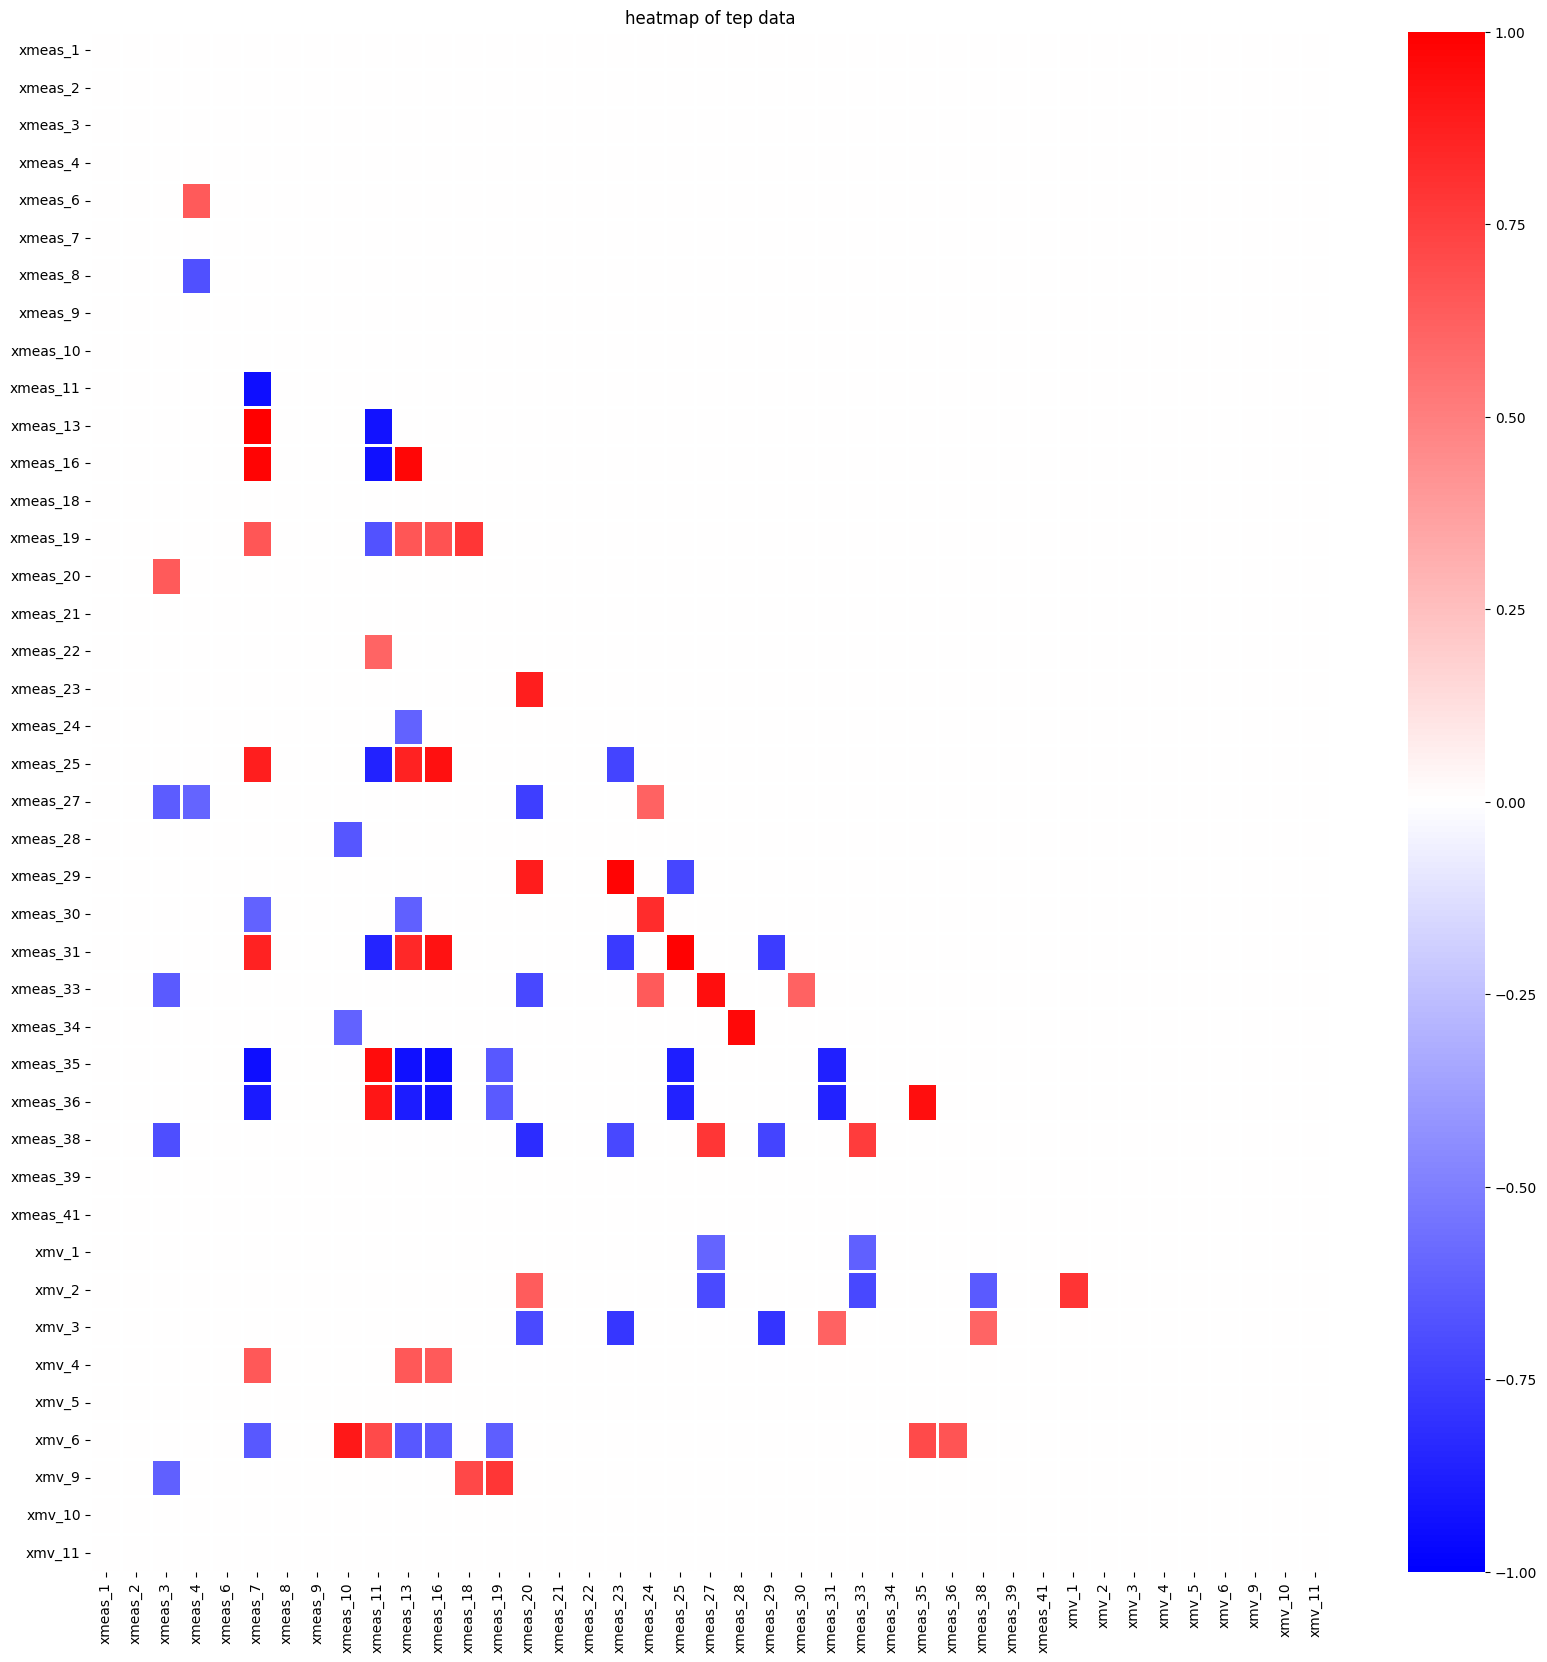

In [20]:
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(corr_combined_dropped, annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1)
axs.set_title('heatmap of tep data')
fig.savefig('tep_combined_dropped_heatmap_tailored_lower_tri.png')

In [21]:
# which variable is correlated with others the most?
# to check this out, count the number of non-zero values in each column
corr_combined_dropped.astype(bool).sum(axis=0).sort_values(ascending=False)

xmeas_7     11
xmeas_13    10
xmeas_11     9
xmeas_20     7
xmeas_16     7
xmeas_3      5
xmeas_23     5
xmeas_25     4
xmeas_19     4
xmeas_27     4
xmeas_29     3
xmeas_10     3
xmeas_33     3
xmeas_31     3
xmeas_24     3
xmeas_4      3
xmeas_18     2
xmeas_35     2
xmeas_38     2
xmeas_36     1
xmeas_30     1
xmv_1        1
xmeas_28     1
xmv_3        0
xmv_4        0
xmeas_41     0
xmv_2        0
xmv_6        0
xmv_9        0
xmv_10       0
xmv_5        0
xmeas_1      0
xmeas_39     0
xmeas_34     0
xmeas_2      0
xmeas_22     0
xmeas_21     0
xmeas_9      0
xmeas_8      0
xmeas_6      0
xmv_11       0
dtype: int64

In [23]:
new_var_dropped = ['xmeas_7','xmeas_13','xmeas_11','xmeas_20','xmeas_16','xmeas_3','xmeas_23']

In [24]:
df_combined_dropped = df_combined_dropped.drop(columns=new_var_dropped)
len(df_combined_dropped.columns[3:])

34

In [25]:
var_dropped.extend(new_var_dropped)

In [27]:
# subtract two string lists
for i in new_var_dropped:
  if i in new_tep:
    new_tep.remove(i)

In this way, we have reduced the number of variables from 52 to 34.

In [26]:
df_combined_dropped

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_4  \
0                  0              1       1  0.25038   3674.0   9.2320   
1                  0              1       2  0.25109   3659.4   9.4264   
2                  0              1       3  0.25038   3660.3   9.4426   
3                  0              1       4  0.24977   3661.3   9.4776   
4                  0              1       5  0.29405   3679.0   9.3381   
...              ...            ...     ...      ...      ...      ...   
4999995           20            500     496  0.23419   3655.3   9.3448   
4999996           20            500     497  0.26704   3647.4   9.3546   
4999997           20            500     498  0.26543   3630.3   9.4089   
4999998           20            500     499  0.27671   3655.7   9.3781   
4999999           20            500     500  0.27421   3640.4   9.3866   

         xmeas_6  xmeas_8  xmeas_9  xmeas_10  ...  xmeas_41   xmv_1   xmv_2  \
0         42.402   74.863   120.41   0.33818  ...    43.828  62.881  53.744   
1         42.576   75.000   120.41   0.33620  ...    43.828  63.132  53.414   
2         42.070   74.771   120.42   0.33563  ...    43.828  63.117  54.357   
3         42.063   75.224   120.39   0.33553  ...    43.828  63.100  53.946   
4         42.650   75.388   120.39   0.32632  ...    43.828  63.313  53.658   
...          ...      ...      ...       ...  ...       ...     ...     ...   
4999995   42.481   74.865   120.40   0.34031  ...    44.022  63.020  53.670   
4999996   42.671   75.204   120.39   0.34504  ...    44.022  62.829  54.650   
4999997   42.470   74.150   120.43   0.34564  ...    44.022  63.124  54.274   
4999998   42.281   74.917   120.37   0.33884  ...    44.022  62.610  53.506   
4999999   41.985   75.195   120.41   0.33787  ...    44.022  62.873  53.800   

          xmv_3   xmv_4   xmv_5   xmv_6   xmv_9  xmv_10  xmv_11  
0        24.657  62.544  22.137  39.935  47.510  41.258  18.447  
1        24.588  59.259  22.084  40.176  47.427  41.359  17.194  
2        24.666  61.275  22.380  40.244  47.468  41.199  20.530  
3        24.725  59.856  22.277  40.257  47.658  41.643  18.089  
4        28.797  60.717  21.947  39.144  47.346  41.507  18.461  
...         ...     ...     ...     ...     ...     ...     ...  
4999995  23.350  61.061  20.719  40.999  47.528  40.212  17.659  
4999996  26.362  60.020  20.263  41.579  47.647  41.199  18.741  
4999997  26.521  59.824  20.189  41.505  47.802  41.302  23.199  
4999998  26.781  62.818  20.453  40.208  48.086  40.510  15.932  
4999999  27.027  59.757  20.157  40.326  48.170  41.115  15.752  

[5250000 rows x 37 columns]

In [54]:
# I would like to see if the data is consistent w.r.t runs and samples, yet both range from one to five hundred..
# as an effort to effectively make the data compact, try this way:

import random
random250 = []
random500 = []

# generate 20 random numbers for each set without replication; 500 -> 40
for i in range(21):
    temp = random.randint(1,250)
    if temp not in random250:
        random250.append(temp)

for i in range(21):
    temp = random.randint(251,500)
    if temp not in random500:
        random500.append(temp)

print(random250[:5])
print(random500[:5])

[157, 80, 167, 5, 169]
[443, 396, 331, 423, 285]


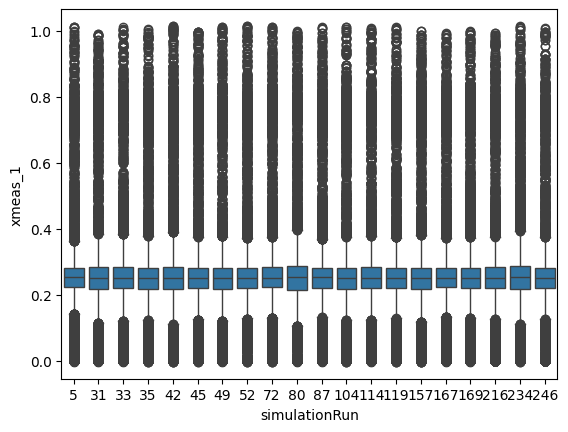

In [55]:
df_combined_dropped250 = df_combined_dropped[df_combined_dropped['simulationRun'].isin(random250)]
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_combined_dropped250)
plt.show()

In [56]:
df_combined_dropped250 = df_combined_dropped[df_combined_dropped['simulationRun'].isin(random250)]
df_combined_dropped500 = df_combined_dropped[df_combined_dropped['simulationRun'].isin(random500)]

df_list = ['df_combined_dropped' + str(i) for i in list(range(250,501,250))]
df_list

['df_combined_dropped250', 'df_combined_dropped500']

In [58]:
# save figures in different img files
nrows = 2
ncols = 2
idx = 0 # index for tep array
figNumMax = len(new_tep)//(nrows*ncols)
figNumMax

8

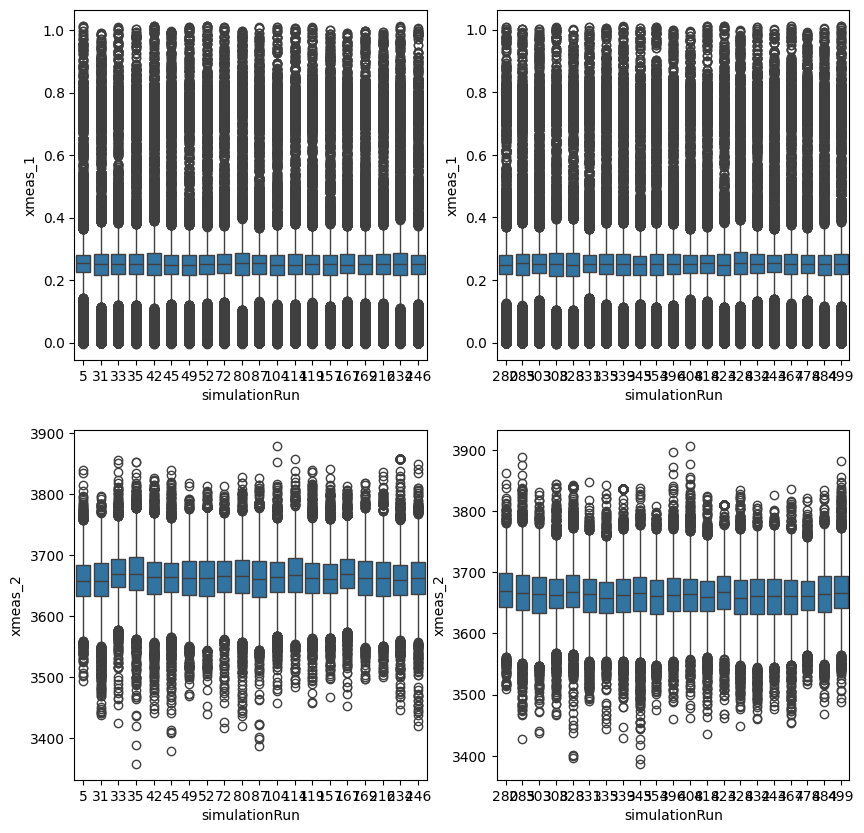

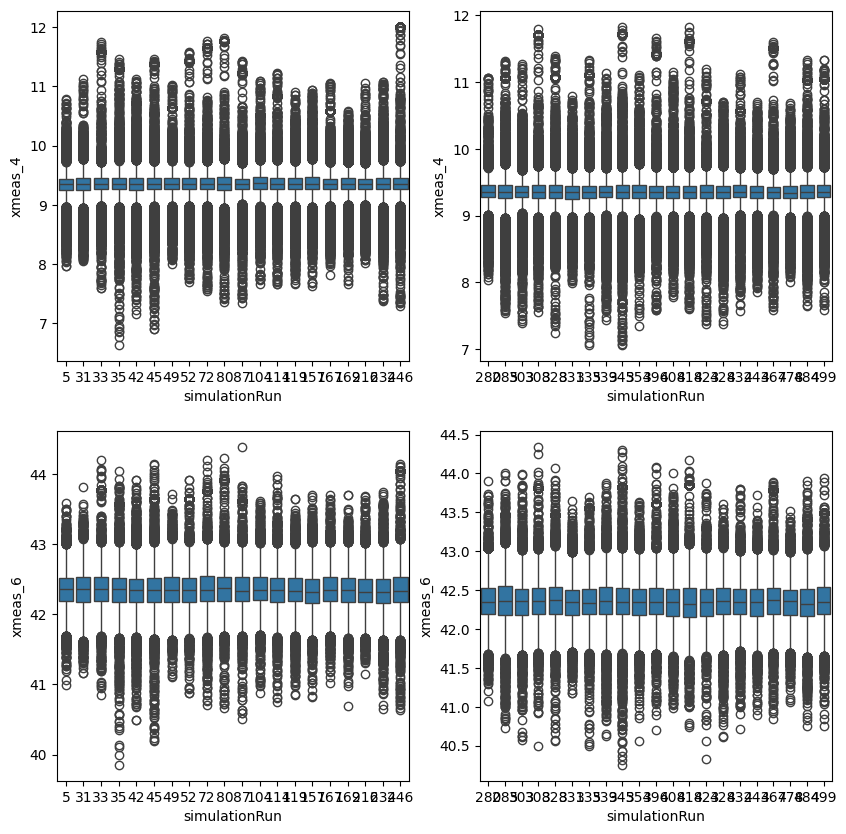

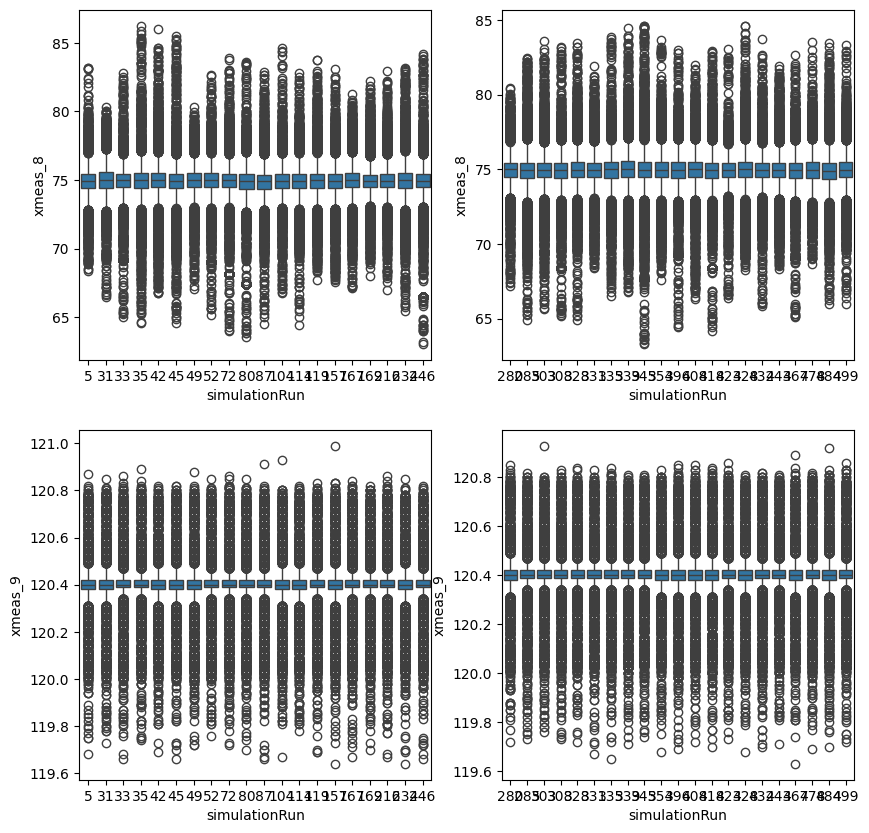

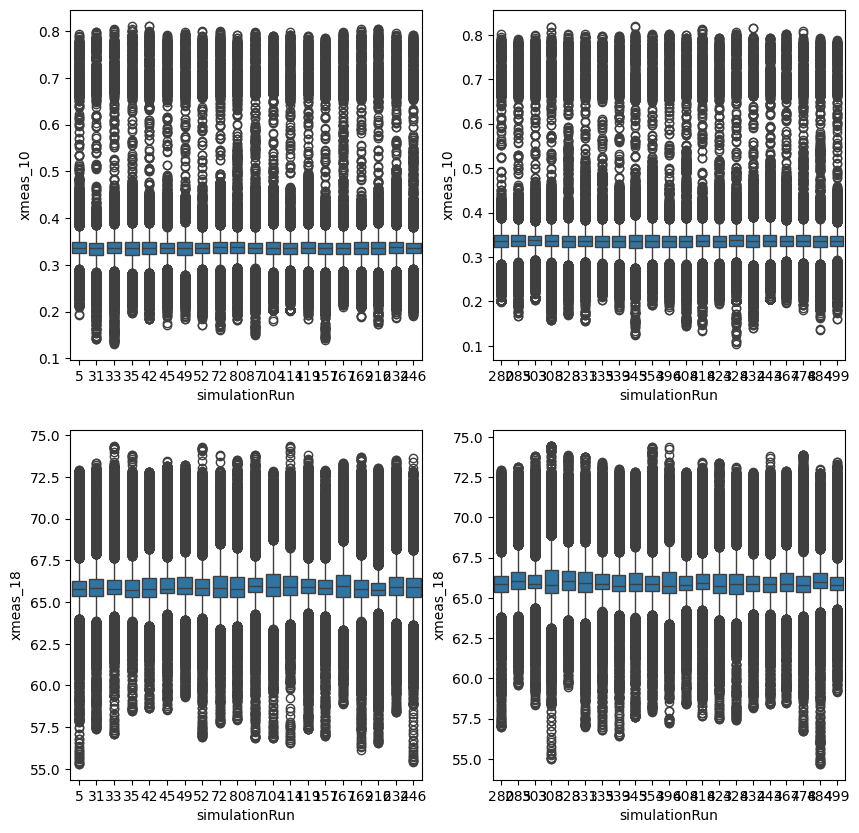

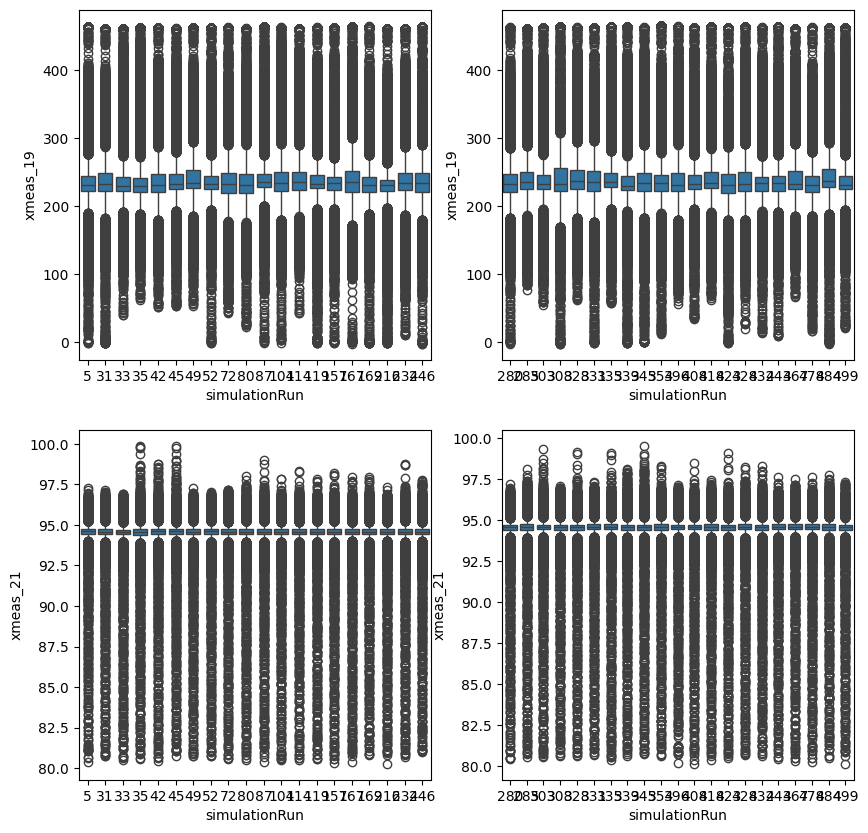

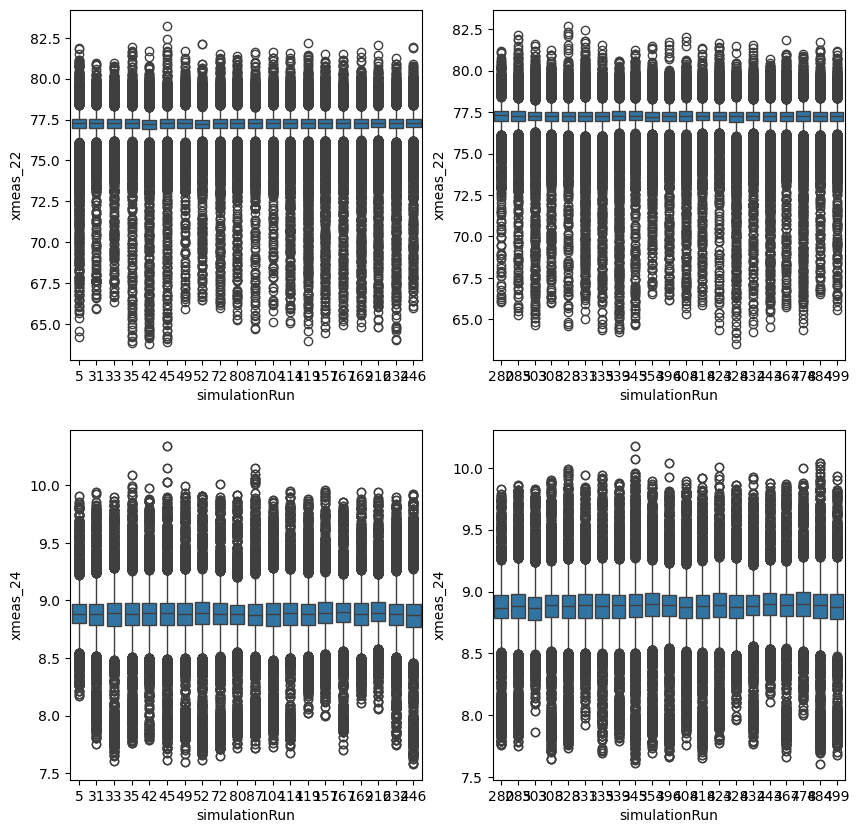

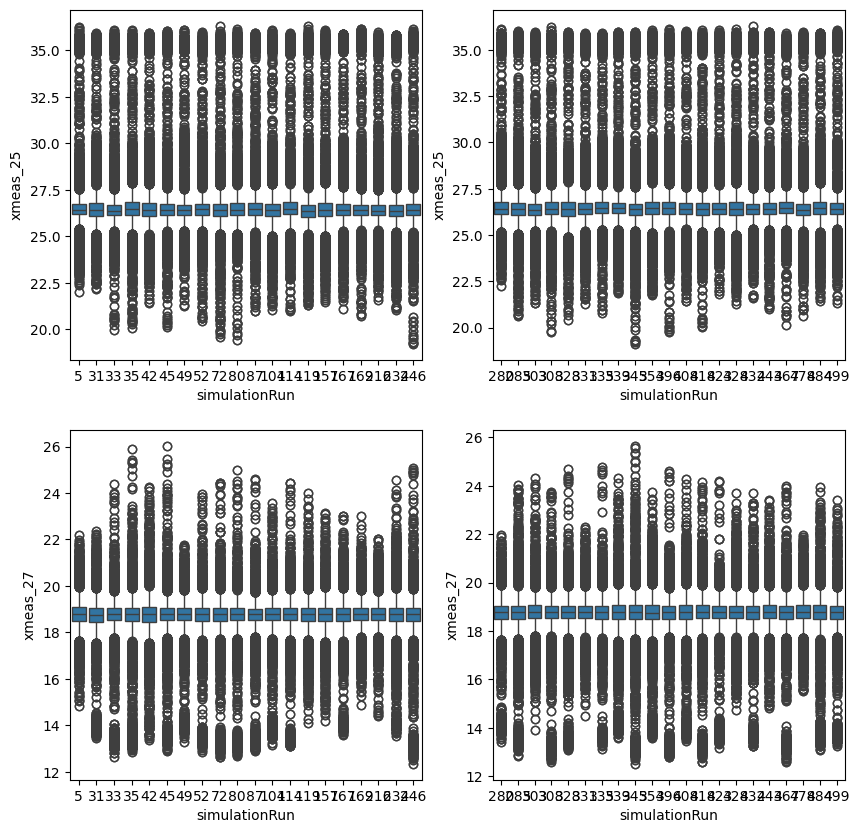

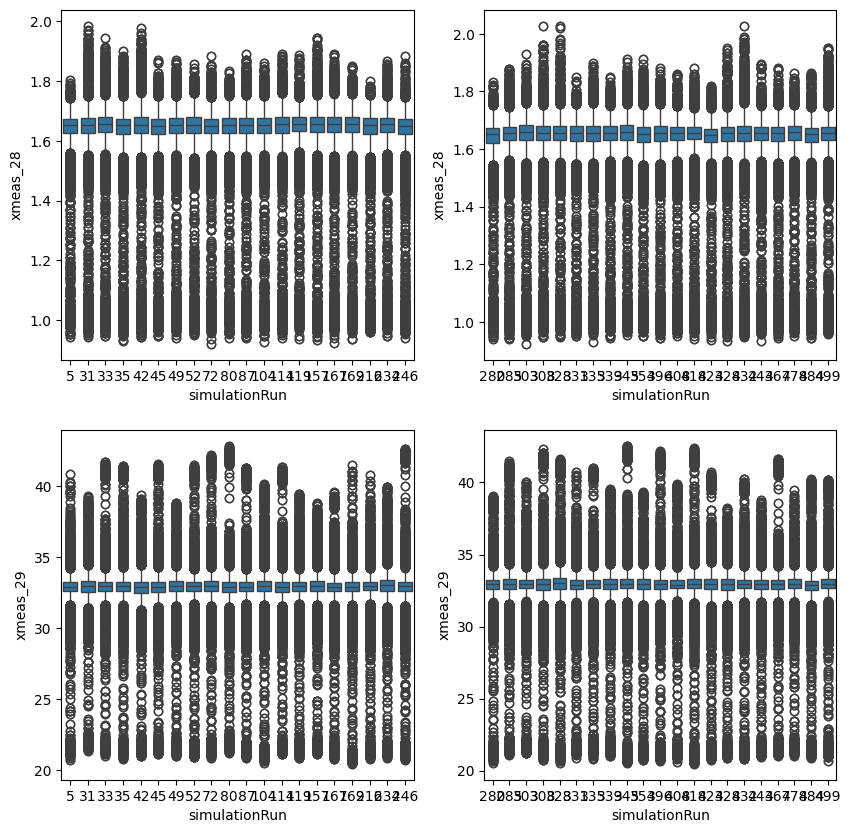

In [59]:
for n in range(figNumMax):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
    for i in range(nrows): # 0, 1
        sns.boxplot(x='simulationRun', y=new_tep[idx], data=df_combined_dropped250, ax=axs[i,0])
        sns.boxplot(x='simulationRun', y=new_tep[idx], data=df_combined_dropped500, ax=axs[i,1])
        idx += 1
    plt.show()
    fig.savefig('tep_run_{n}.png'.format(n=n+1))

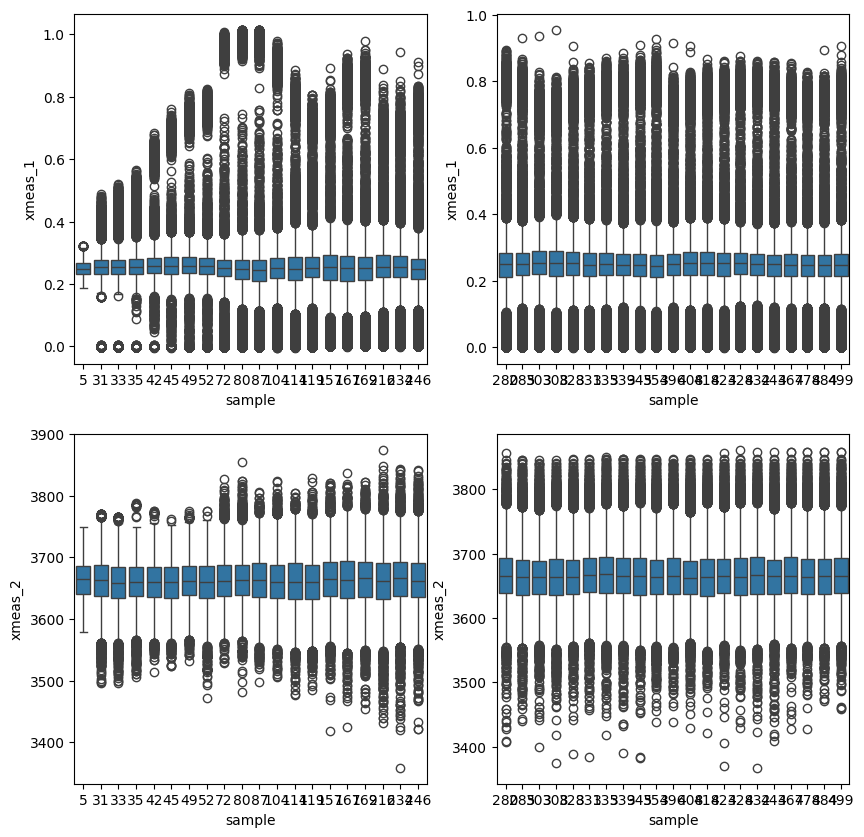

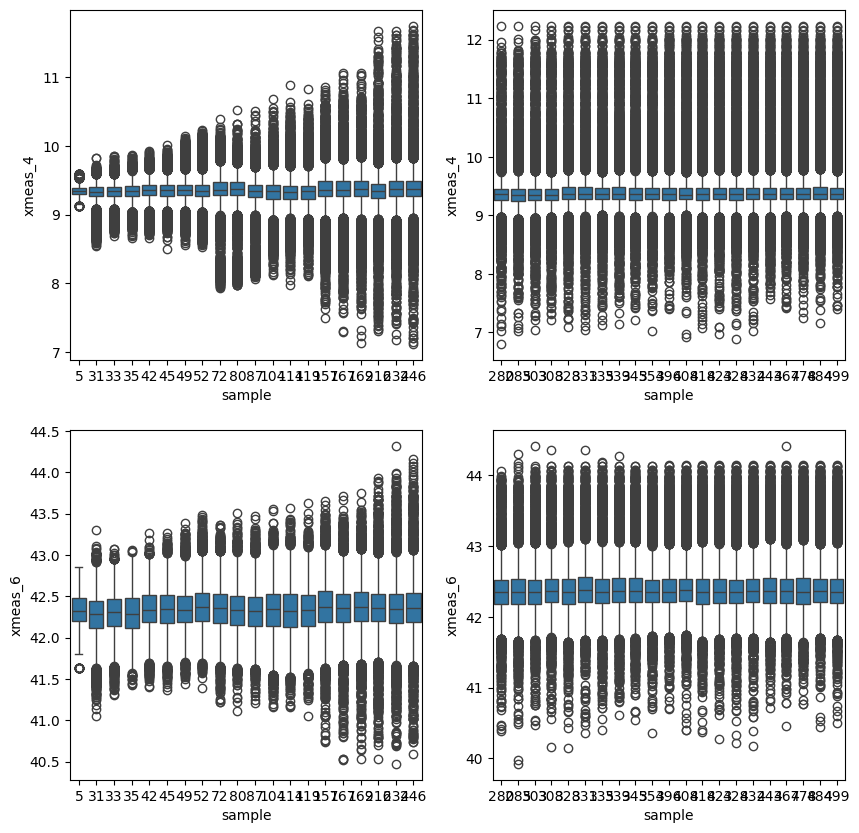

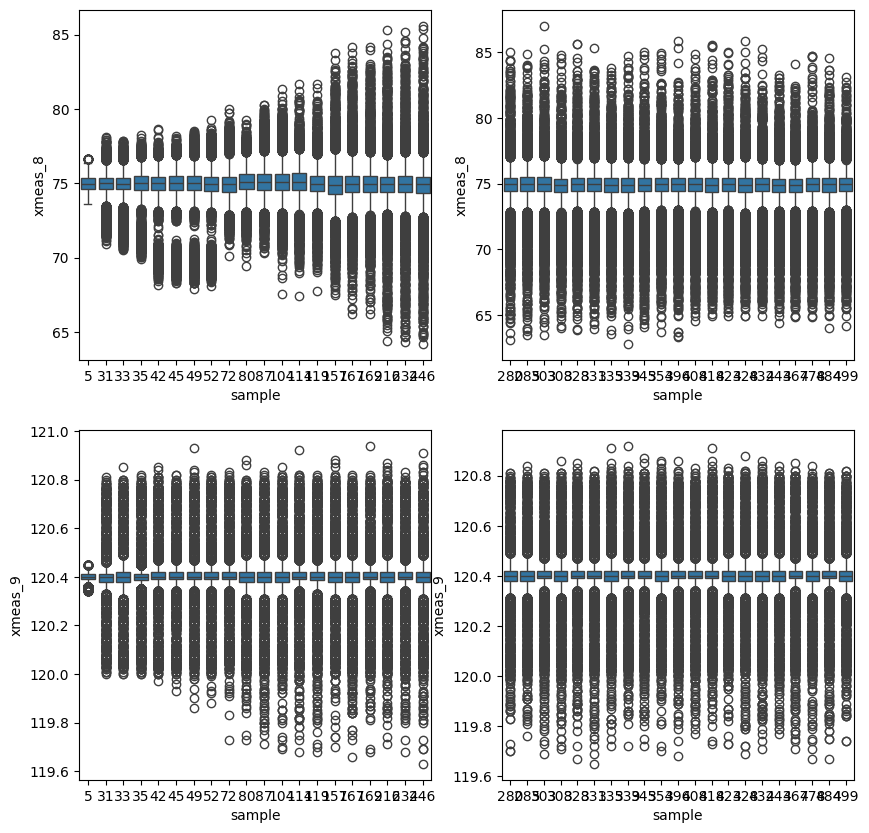

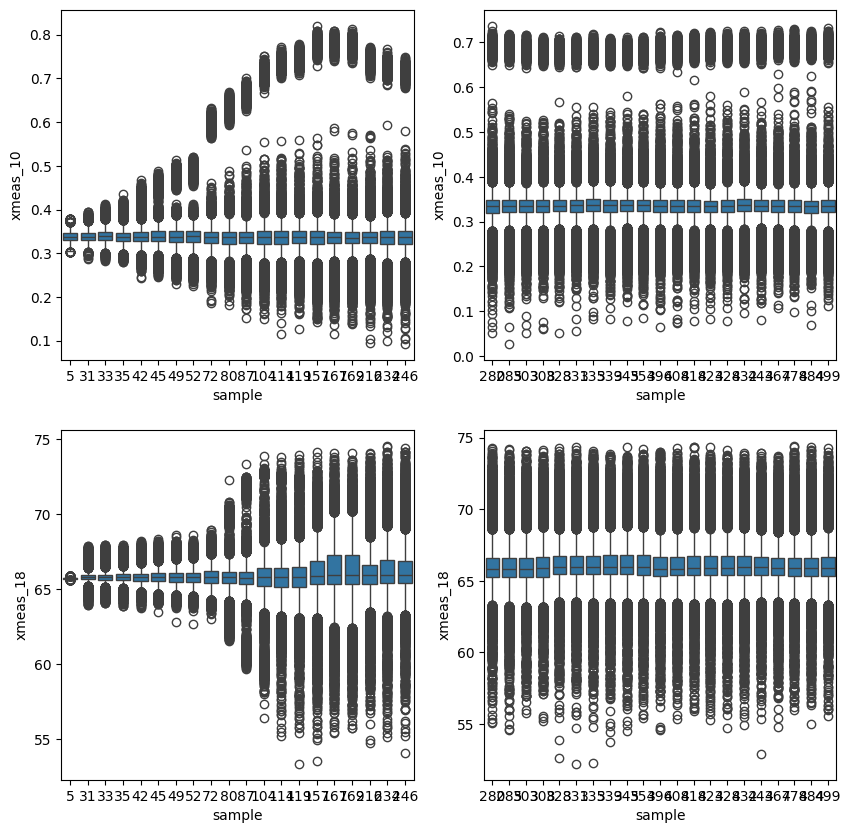

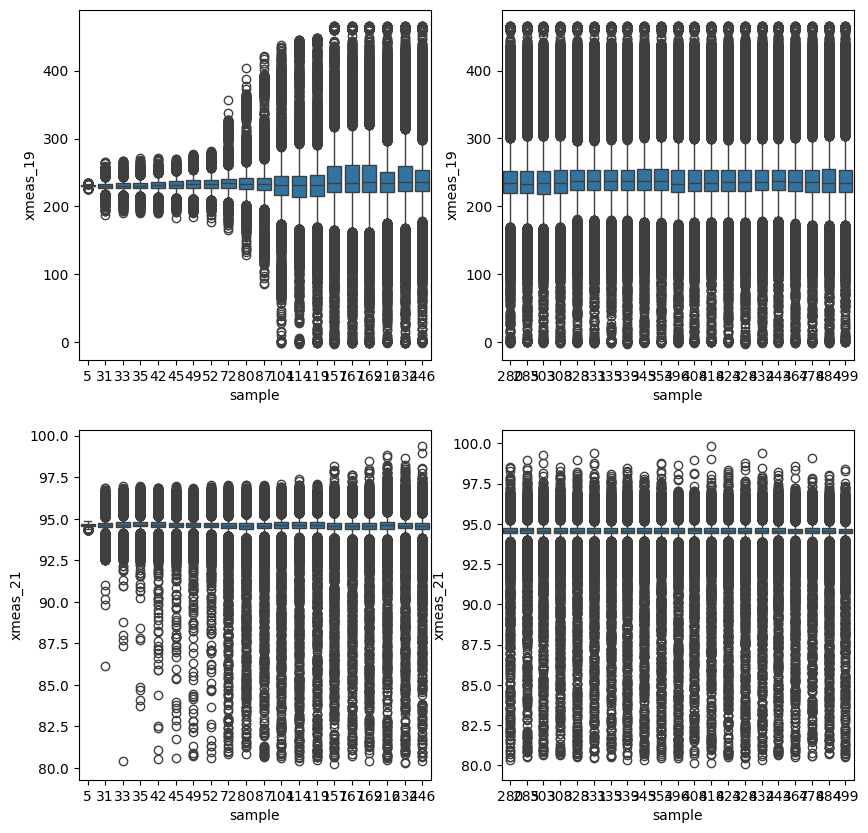

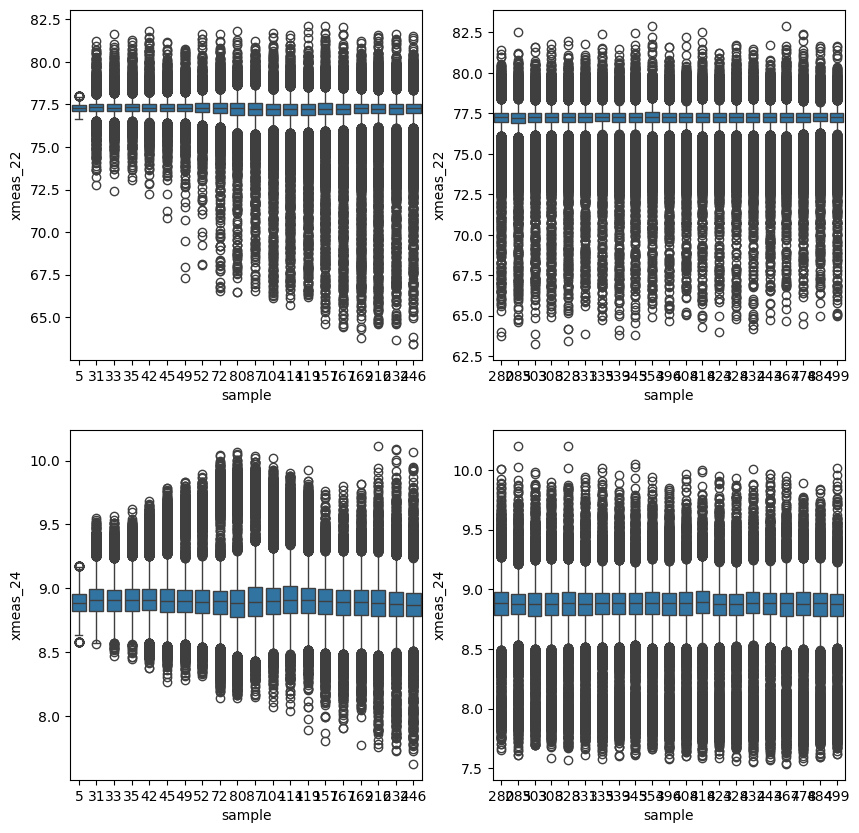

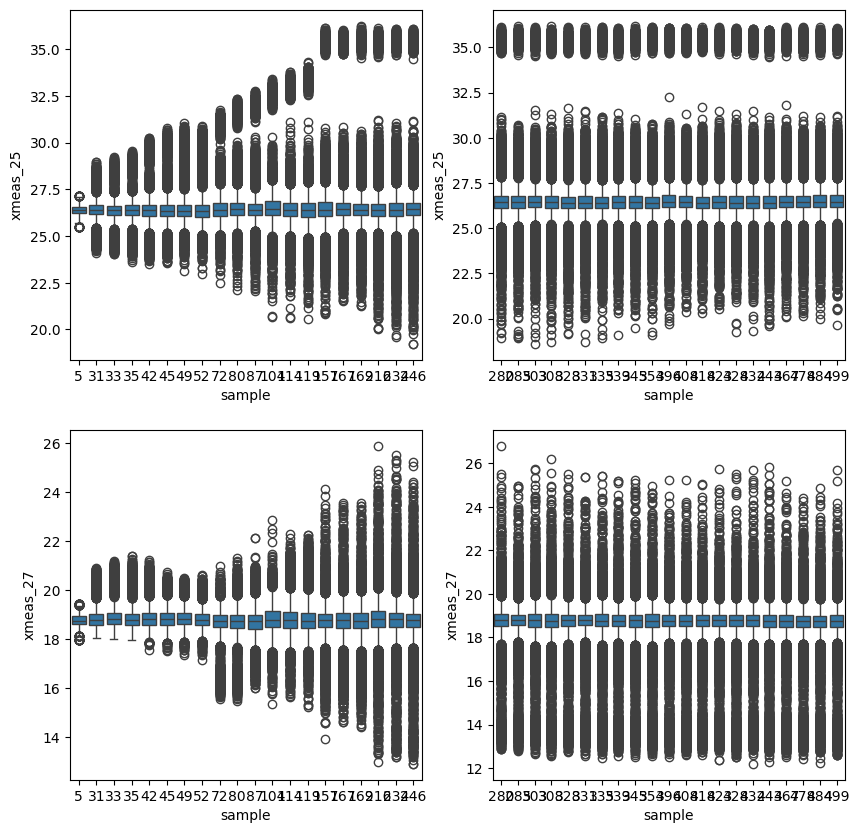

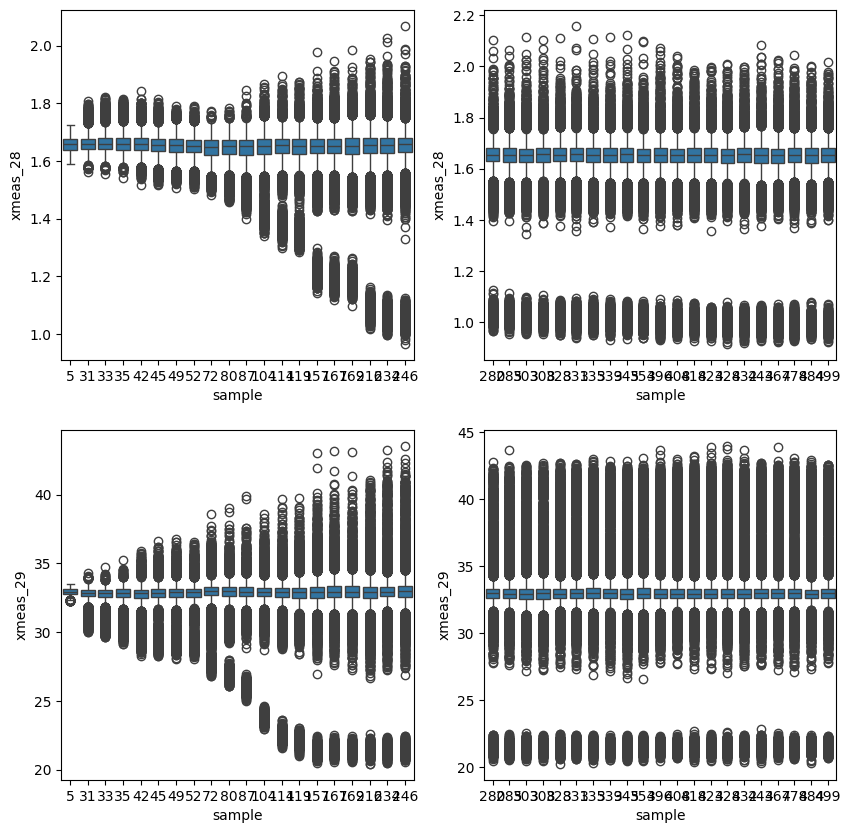

In [60]:
# do the same to samples
df_combined_dropped250 = df_combined_dropped[df_combined_dropped['sample'].isin(random250)]
df_combined_dropped500 = df_combined_dropped[df_combined_dropped['sample'].isin(random500)]

idx = 0

for n in range(figNumMax):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
    for i in range(nrows): # 0, 1
        sns.boxplot(x='sample', y=new_tep[idx], data=df_combined_dropped250, ax=axs[i,0])
        sns.boxplot(x='sample', y=new_tep[idx], data=df_combined_dropped500, ax=axs[i,1])
        idx += 1
    plt.show()
    fig.savefig('tep_sampe_{n}.png'.format(n=n+1))

In [ ]:
# to this end, transform df_combined to list
tep_tsne_data = df_combined.iloc[:,3:].values.tolist()
tep_tsne_data = np.array(tep_tsne_data).reshape(-1,52)
tep_tsne_data.shape()

In [43]:
# apply TSNE to the data
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tep_tsne = tsne.fit_transform(df_combined.iloc[:,3:].values.tolist())

# randomly generated hex colors
colors = ['#2ac759', '#3487d9', '#3cda88', '#c89d59', '#fd3f6a', '#3c84d3', '#d6c52f', '#d6d354', '#044050',
          '#ce08e0', '#4c3ad2', '#0c15ba', '#1e818e', '#d1b6a2', '#675267', '#b44fda', '#72d891', '#724605',
         '#aaefcc', '#681153', '#9738d8']

# plot with numbers
plt.figure(figsize=(10,10))
plt.xlim(tep_tsne[:,0].min(), tep_tsne[:,0].max()+1)
plt.ylim(tep_tsne[:,1].min(), tep_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(tep_tsne[i,0], tep_tsne[i,1], str(df_combined['faultNumber']))
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

AttributeError: 'list' object has no attribute 'shape'

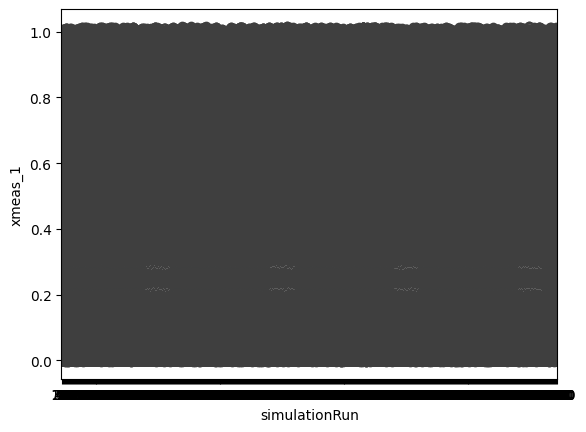

In [96]:
# check the consistency of the data in the same way
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_fault)
plt.show()

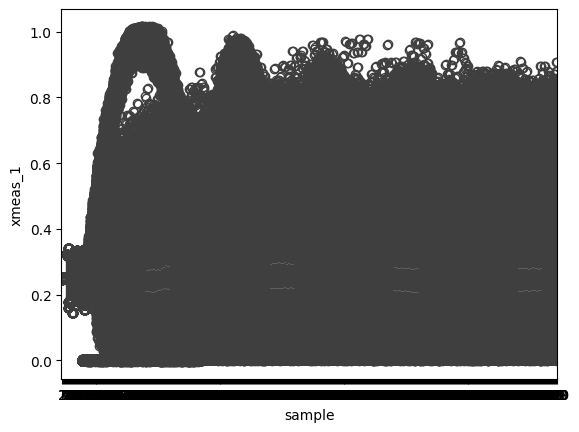

In [97]:
sns.boxplot(x='sample', y='xmeas_1', data=df_fault)
plt.show()

21 : [117, 108, 207, 50, 233, 61, 309, 292, 151, 188, 408, 109, 30, 499, 340, 457, 404, 353, 181, 361, 31]


In [118]:
df_fault_run20 = df_fault[df_fault['simulationRun'].isin(random_idx)]
df_fault_run20.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
290000            1           30.0       1  0.24981   3655.6   4512.4   
290001            1           30.0       2  0.24902   3660.3   4513.1   
290002            1           30.0       3  0.25094   3665.7   4529.1   
290003            1           30.0       4  0.25070   3623.7   4503.0   
290004            1           30.0       5  0.23859   3651.7   4549.7   

        xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
290000   9.4059   26.855   42.614   2705.4  ...  53.943  24.714  61.360   
290001   9.2877   27.044   42.438   2707.1  ...  53.935  24.791  61.910   
290002   9.3366   26.666   42.518   2706.4  ...  53.742  24.611  59.607   
290003   9.3324   26.742   42.378   2705.5  ...  54.054  24.634  60.879   
290004   9.3163   27.162   42.250   2701.2  ...  53.603  23.571  64.185   

         xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
290000  22.086  40.071  33.381  46.373  47.447  40.985  13.507  
290001  22.492  40.147  38.888  46.205  47.502  41.262  18.439  
290002  22.141  39.839  36.748  47.442  47.486  40.830  19.149  
290003  22.000  39.955  41.609  49.220  47.513  41.071  17.819  
290004  22.026  40.739  41.489  50.473  47.603  40.494  19.130  

[5 rows x 55 columns]

In [119]:
df_fault_run20['simulationRun'].unique()

array([ 30.,  31.,  50.,  61., 108., 109., 117., 151., 181., 188., 207.,
       233., 292., 309., 340., 353., 361., 404., 408., 457., 499.])

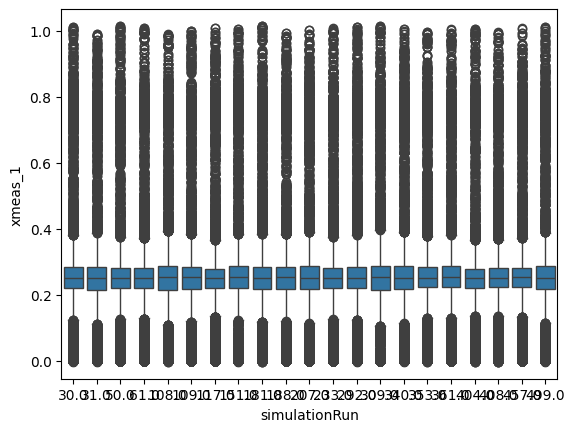

In [120]:
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_fault_run20)
plt.show()

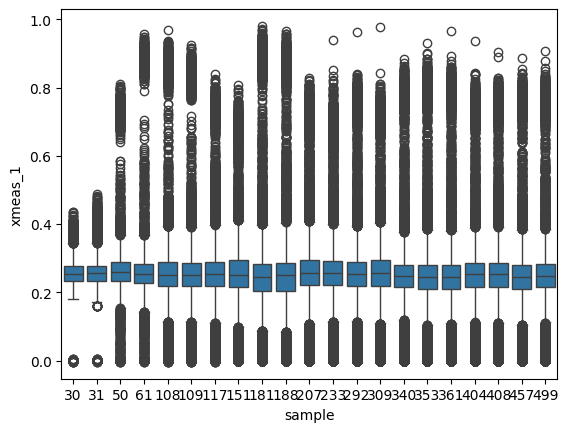

In [121]:
df_fault_sample20 = df_fault[df_fault['sample'].isin(random_idx)]
sns.boxplot(x='sample', y='xmeas_1', data=df_fault_sample20)
plt.show()

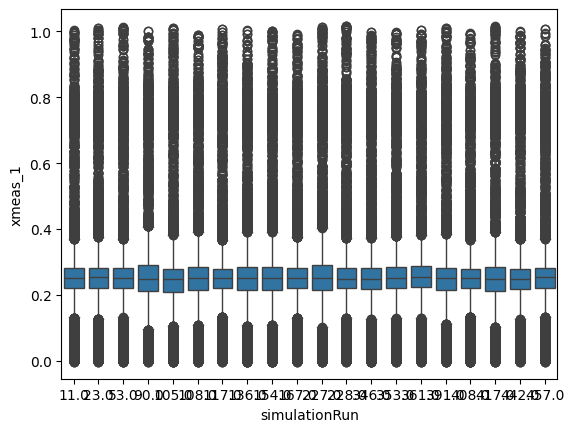

In [122]:
# do this with other 20 samples
random_idx = []
for i in range(21):
    temp = random.randint(1,500)
    if temp not in random_idx:
        random_idx.append(temp)

# run
df_fault_run20 = df_fault[df_fault['simulationRun'].isin(random_idx)]
sns.boxplot(x='simulationRun', y='xmeas_1', data=df_fault_run20)
plt.show()

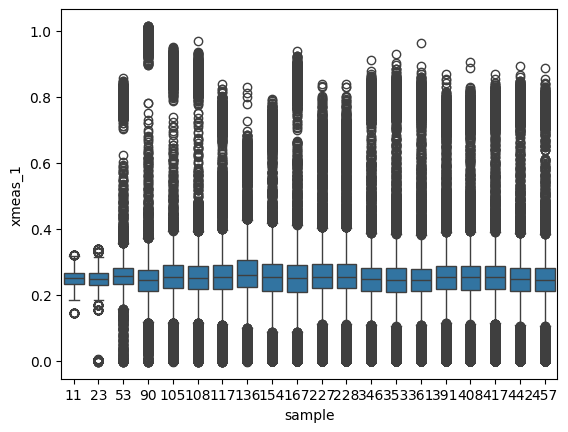

In [123]:
df_fault_sample20 = df_fault[df_fault['sample'].isin(random_idx)]
sns.boxplot(x='sample', y='xmeas_1', data=df_fault_sample20)
plt.show()

In [ ]:
# check the consistency with respect to other tep variables